In [1]:
#libraries we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/Users/yanglingxi/Documents/GitHub/Anti-Corruption1/Data Prep/Data to Impute/final_data.csv')

<AxesSubplot:>

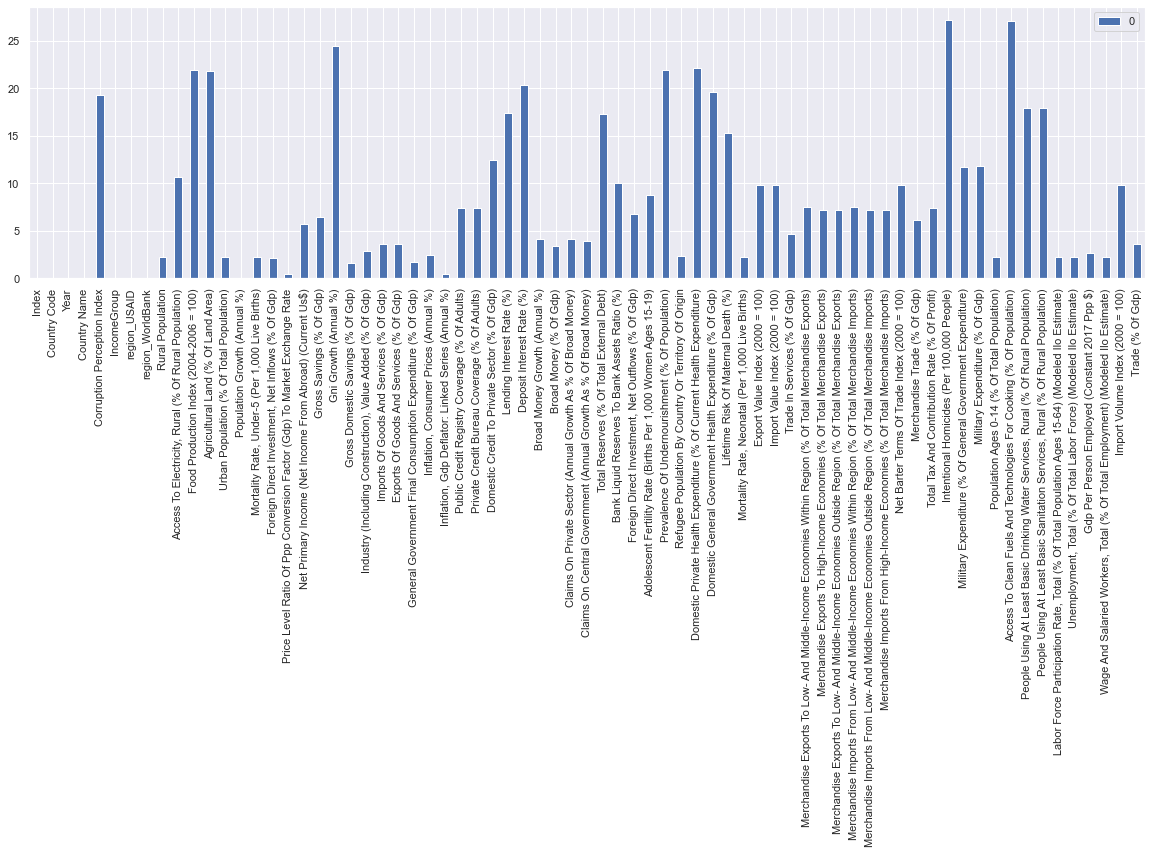

In [3]:
pd.DataFrame(df.isna().sum()*100/df.shape[0]).plot.bar(figsize=(20,5))

In [4]:
df.columns

Index(['Index', 'Country Code', 'Year', 'Country Name',
       'Corruption Perception Index', 'IncomeGroup', 'region_USAID',
       'region_WorldBank', 'Rural Population',
       'Access To Electricity, Rural (% Of Rural Population)',
       'Food Production Index (2004-2006 = 100)',
       'Agricultural Land (% Of Land Area)',
       'Urban Population (% Of Total Population)',
       'Population Growth (Annual %)',
       'Mortality Rate, Under-5 (Per 1,000 Live Births)',
       'Foreign Direct Investment, Net Inflows (% Of Gdp)',
       'Price Level Ratio Of Ppp Conversion Factor (Gdp) To Market Exchange Rate',
       'Net Primary Income (Net Income From Abroad) (Current Us$)',
       'Gross Savings (% Of Gdp)', 'Gni Growth (Annual %)',
       'Gross Domestic Savings (% Of Gdp)',
       'Industry (Including Construction), Value Added (% Of Gdp)',
       'Imports Of Goods And Services (% Of Gdp)',
       'Exports Of Goods And Services (% Of Gdp)',
       'General Government Final Cons

In [5]:
#pd.DataFrame(df.isnull().sum()).to_csv('check.csv')

## Price Level Ratio Of Ppp Conversion Factor (Gdp) To Market Exchange Rate

In [6]:
sample_impute = pd.get_dummies(df[['Index', 'Country Name','Year'
    ,'IncomeGroup', 'region_USAID',
       'region_WorldBank',
    'Population Growth (Annual %)',
    'Price Level Ratio Of Ppp Conversion Factor (Gdp) To Market Exchange Rate']])

# Split the data into two datasets
#train
sample_imputeKnown = sample_impute[sample_impute['Price Level Ratio Of Ppp Conversion Factor (Gdp) To Market Exchange Rate'].notnull()] # without NaN

#test
sample_imputeUnknown = sample_impute[sample_impute['Price Level Ratio Of Ppp Conversion Factor (Gdp) To Market Exchange Rate'].isnull()] #with null values


# splitting the train set into X and y
sample_imputeKnown_X = sample_imputeKnown.drop(['Price Level Ratio Of Ppp Conversion Factor (Gdp) To Market Exchange Rate'], axis = 1)
sample_imputeKnown_y = sample_imputeKnown['Price Level Ratio Of Ppp Conversion Factor (Gdp) To Market Exchange Rate']

#preparing the test set
sample_imputeUnknown_X = sample_imputeUnknown.drop(['Price Level Ratio Of Ppp Conversion Factor (Gdp) To Market Exchange Rate'], axis = 1)

0.9987176166617914


<AxesSubplot:>

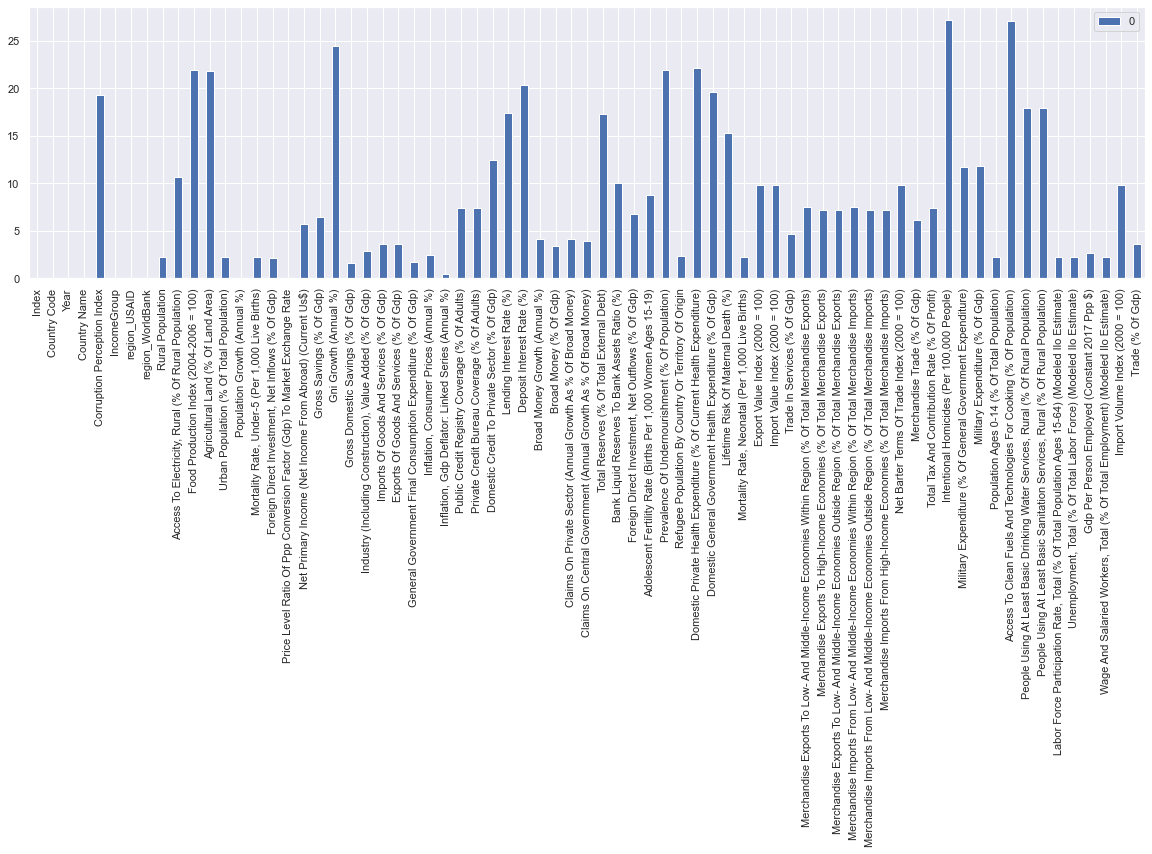

In [7]:
# Build model using random forest
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor(random_state=1,n_estimators=500,n_jobs=-1)

rfr.fit(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y)

print(rfr.score(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y))

#prediction
sample_imputeUnknown_y = rfr.predict(sample_imputeUnknown_X.iloc[:,1:])

df.loc[df['Price Level Ratio Of Ppp Conversion Factor (Gdp) To Market Exchange Rate'].isnull(), 'Price Level Ratio Of Ppp Conversion Factor (Gdp) To Market Exchange Rate'] = sample_imputeUnknown_y

pd.DataFrame(df.isna().sum()*100/df.shape[0]).plot.bar(figsize=(20,5))

## Inflation, Gdp Deflator: Linked Series (Annual %)

In [8]:
sample_impute = pd.get_dummies(df[['Index', 'Country Name','Year'
    ,'IncomeGroup', 'region_USAID',
       'region_WorldBank',
    'Population Growth (Annual %)',
    'Inflation, Gdp Deflator: Linked Series (Annual %)','Price Level Ratio Of Ppp Conversion Factor (Gdp) To Market Exchange Rate']])

# Split the data into two datasets
#train
sample_imputeKnown = sample_impute[sample_impute['Inflation, Gdp Deflator: Linked Series (Annual %)'].notnull()] # without NaN

#test
sample_imputeUnknown = sample_impute[sample_impute['Inflation, Gdp Deflator: Linked Series (Annual %)'].isnull()] #with null values


# splitting the train set into X and y
sample_imputeKnown_X = sample_imputeKnown.drop(['Inflation, Gdp Deflator: Linked Series (Annual %)'], axis = 1)
sample_imputeKnown_y = sample_imputeKnown['Inflation, Gdp Deflator: Linked Series (Annual %)']

#preparing the test set
sample_imputeUnknown_X = sample_imputeUnknown.drop(['Inflation, Gdp Deflator: Linked Series (Annual %)'], axis = 1)

0.987525259091785


<AxesSubplot:>

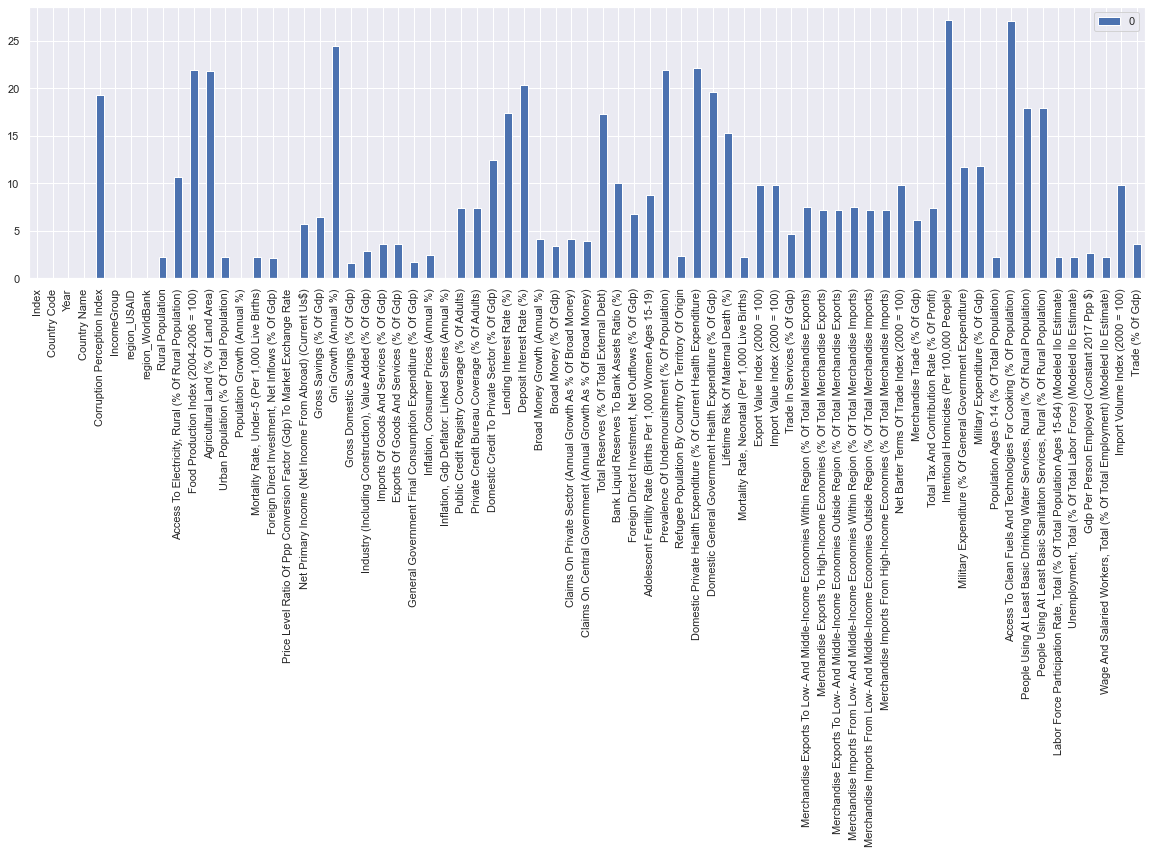

In [9]:
# Build model using random forest
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor(random_state=1,n_estimators=500,n_jobs=-1)

rfr.fit(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y)

print(rfr.score(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y))

#prediction
sample_imputeUnknown_y = rfr.predict(sample_imputeUnknown_X.iloc[:,1:])

df.loc[df['Inflation, Gdp Deflator: Linked Series (Annual %)'].isnull(), 'Inflation, Gdp Deflator: Linked Series (Annual %)'] = sample_imputeUnknown_y

pd.DataFrame(df.isna().sum()*100/df.shape[0]).plot.bar(figsize=(20,5))

## Gross Domestic Savings (% Of Gdp)

In [10]:
sample_impute = pd.get_dummies(df[['Index', 'Country Name','Year'
    ,'IncomeGroup', 'region_USAID',
       'region_WorldBank',
    'Population Growth (Annual %)',
    'Inflation, Gdp Deflator: Linked Series (Annual %)','Price Level Ratio Of Ppp Conversion Factor (Gdp) To Market Exchange Rate','Gross Domestic Savings (% Of Gdp)']])

# Split the data into two datasets
#train
sample_imputeKnown = sample_impute[sample_impute['Gross Domestic Savings (% Of Gdp)'].notnull()] # without NaN

#test
sample_imputeUnknown = sample_impute[sample_impute['Gross Domestic Savings (% Of Gdp)'].isnull()] #with null values


# splitting the train set into X and y
sample_imputeKnown_X = sample_imputeKnown.drop(['Gross Domestic Savings (% Of Gdp)'], axis = 1)
sample_imputeKnown_y = sample_imputeKnown['Gross Domestic Savings (% Of Gdp)']

#preparing the test set
sample_imputeUnknown_X = sample_imputeUnknown.drop(['Gross Domestic Savings (% Of Gdp)'], axis = 1)

0.9991705321725797


<AxesSubplot:>

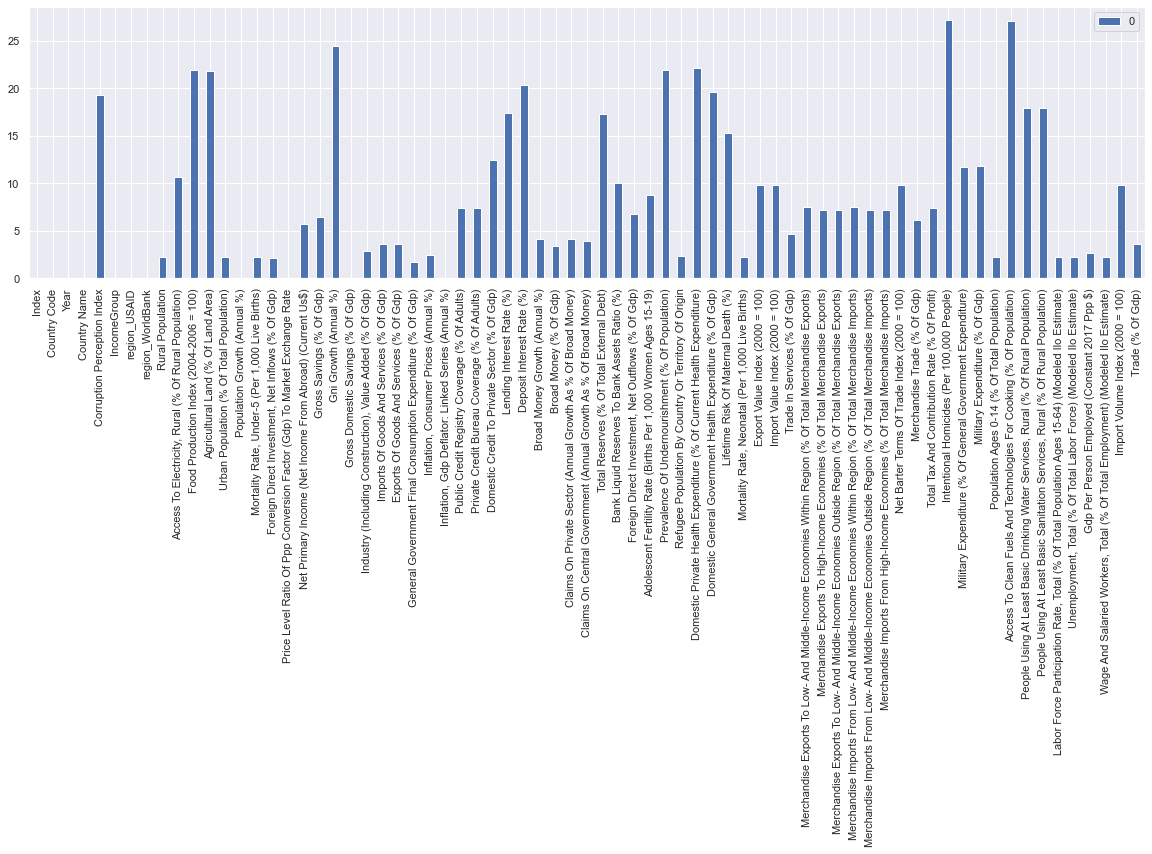

In [11]:
# Build model using random forest
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor(random_state=1,n_estimators=500,n_jobs=-1)

rfr.fit(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y)

print(rfr.score(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y))

#prediction
sample_imputeUnknown_y = rfr.predict(sample_imputeUnknown_X.iloc[:,1:])

df.loc[df['Gross Domestic Savings (% Of Gdp)'].isnull(), 'Gross Domestic Savings (% Of Gdp)'] = sample_imputeUnknown_y

pd.DataFrame(df.isna().sum()*100/df.shape[0]).plot.bar(figsize=(20,5))

## General Government Final Consumption Expenditure (% Of Gdp)

In [12]:
sample_impute = pd.get_dummies(df[['Index', 'Country Name','Year'
    ,'IncomeGroup', 'region_USAID',
       'region_WorldBank',
    'Population Growth (Annual %)',
    'Inflation, Gdp Deflator: Linked Series (Annual %)','Price Level Ratio Of Ppp Conversion Factor (Gdp) To Market Exchange Rate','Gross Domestic Savings (% Of Gdp)','General Government Final Consumption Expenditure (% Of Gdp)']])

# Split the data into two datasets
#train
sample_imputeKnown = sample_impute[sample_impute['General Government Final Consumption Expenditure (% Of Gdp)'].notnull()] # without NaN

#test
sample_imputeUnknown = sample_impute[sample_impute['General Government Final Consumption Expenditure (% Of Gdp)'].isnull()] #with null values


# splitting the train set into X and y
sample_imputeKnown_X = sample_imputeKnown.drop(['General Government Final Consumption Expenditure (% Of Gdp)'], axis = 1)
sample_imputeKnown_y = sample_imputeKnown['General Government Final Consumption Expenditure (% Of Gdp)']

#preparing the test set
sample_imputeUnknown_X = sample_imputeUnknown.drop(['General Government Final Consumption Expenditure (% Of Gdp)'], axis = 1)

0.9984413889737825


<AxesSubplot:>

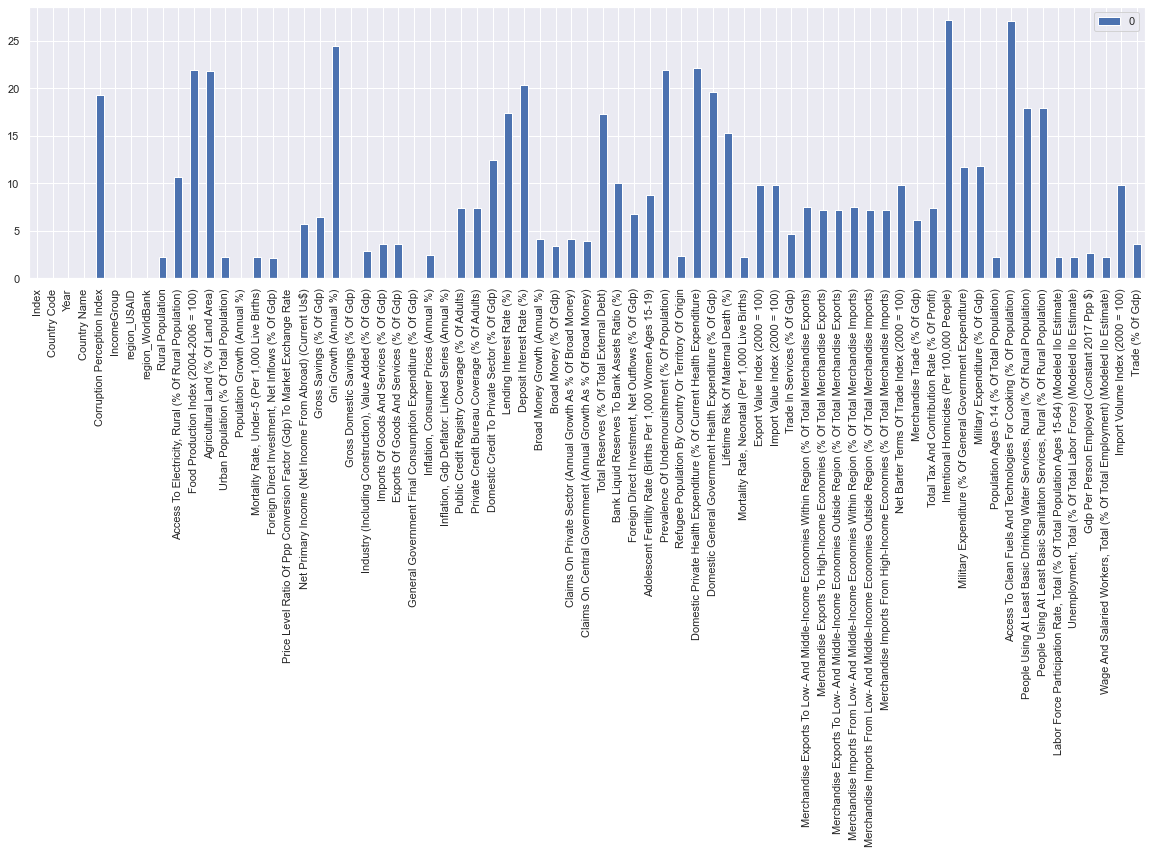

In [13]:
# Build model using random forest
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor(random_state=1,n_estimators=500,n_jobs=-1)

rfr.fit(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y)

print(rfr.score(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y))

#prediction
sample_imputeUnknown_y = rfr.predict(sample_imputeUnknown_X.iloc[:,1:])

df.loc[df['General Government Final Consumption Expenditure (% Of Gdp)'].isnull(), 'General Government Final Consumption Expenditure (% Of Gdp)'] = sample_imputeUnknown_y

pd.DataFrame(df.isna().sum()*100/df.shape[0]).plot.bar(figsize=(20,5))

## Foreign Direct Investment, Net Inflows (% Of Gdp)

In [14]:
sample_impute = pd.get_dummies(df[['Index', 'Country Name','Year'
    ,'IncomeGroup', 'region_USAID',
       'region_WorldBank',
    'Population Growth (Annual %)',
    'Inflation, Gdp Deflator: Linked Series (Annual %)',
                                   'Price Level Ratio Of Ppp Conversion Factor (Gdp) To Market Exchange Rate',
                                   'Gross Domestic Savings (% Of Gdp)',
                                   'General Government Final Consumption Expenditure (% Of Gdp)'
                                  ,'Foreign Direct Investment, Net Inflows (% Of Gdp)']])

# Split the data into two datasets
#train
sample_imputeKnown = sample_impute[sample_impute['Foreign Direct Investment, Net Inflows (% Of Gdp)'].notnull()] # without NaN

#test
sample_imputeUnknown = sample_impute[sample_impute['Foreign Direct Investment, Net Inflows (% Of Gdp)'].isnull()] #with null values


# splitting the train set into X and y
sample_imputeKnown_X = sample_imputeKnown.drop(['Foreign Direct Investment, Net Inflows (% Of Gdp)'], axis = 1)
sample_imputeKnown_y = sample_imputeKnown['Foreign Direct Investment, Net Inflows (% Of Gdp)']

#preparing the test set
sample_imputeUnknown_X = sample_imputeUnknown.drop(['Foreign Direct Investment, Net Inflows (% Of Gdp)'], axis = 1)

0.997029156016154


<AxesSubplot:>

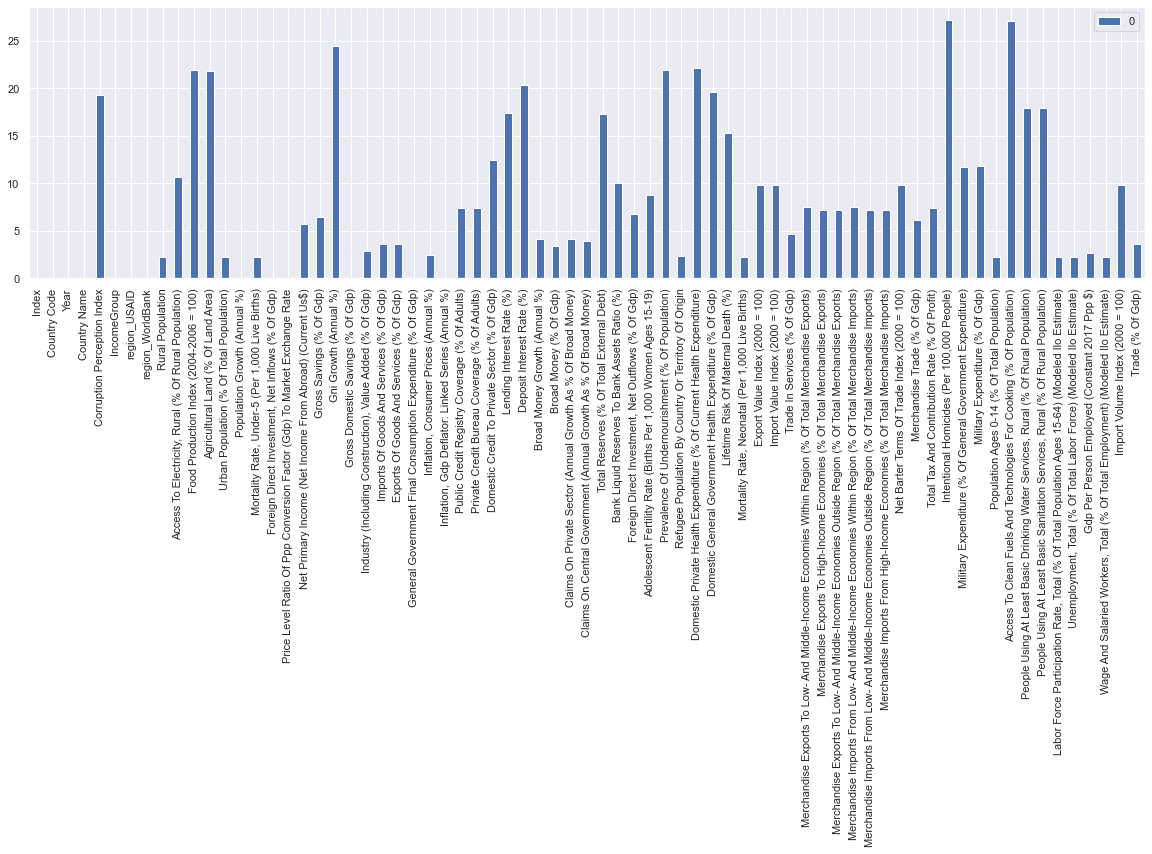

In [15]:
# Build model using random forest
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor(random_state=1,n_estimators=500,n_jobs=-1)

rfr.fit(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y)

print(rfr.score(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y))

#prediction
sample_imputeUnknown_y = rfr.predict(sample_imputeUnknown_X.iloc[:,1:])

df.loc[df['Foreign Direct Investment, Net Inflows (% Of Gdp)'].isnull(), 'Foreign Direct Investment, Net Inflows (% Of Gdp)'] = sample_imputeUnknown_y

pd.DataFrame(df.isna().sum()*100/df.shape[0]).plot.bar(figsize=(20,5))

## Urban Population (% Of Total Population)

In [16]:
sample_impute = pd.get_dummies(df[['Index', 'Country Name','Year'
    ,'IncomeGroup', 'region_USAID',
       'region_WorldBank',
    'Population Growth (Annual %)',
    'Inflation, Gdp Deflator: Linked Series (Annual %)',
                                   'Price Level Ratio Of Ppp Conversion Factor (Gdp) To Market Exchange Rate',
                                   'Gross Domestic Savings (% Of Gdp)',
                                   'General Government Final Consumption Expenditure (% Of Gdp)'
                                  ,'Urban Population (% Of Total Population)']])

# Split the data into two datasets
#train
sample_imputeKnown = sample_impute[sample_impute['Urban Population (% Of Total Population)'].notnull()] # without NaN

#test
sample_imputeUnknown = sample_impute[sample_impute['Urban Population (% Of Total Population)'].isnull()] #with null values


# splitting the train set into X and y
sample_imputeKnown_X = sample_imputeKnown.drop(['Urban Population (% Of Total Population)'], axis = 1)
sample_imputeKnown_y = sample_imputeKnown['Urban Population (% Of Total Population)']

#preparing the test set
sample_imputeUnknown_X = sample_imputeUnknown.drop(['Urban Population (% Of Total Population)'], axis = 1)

0.9998267436936484


<AxesSubplot:>

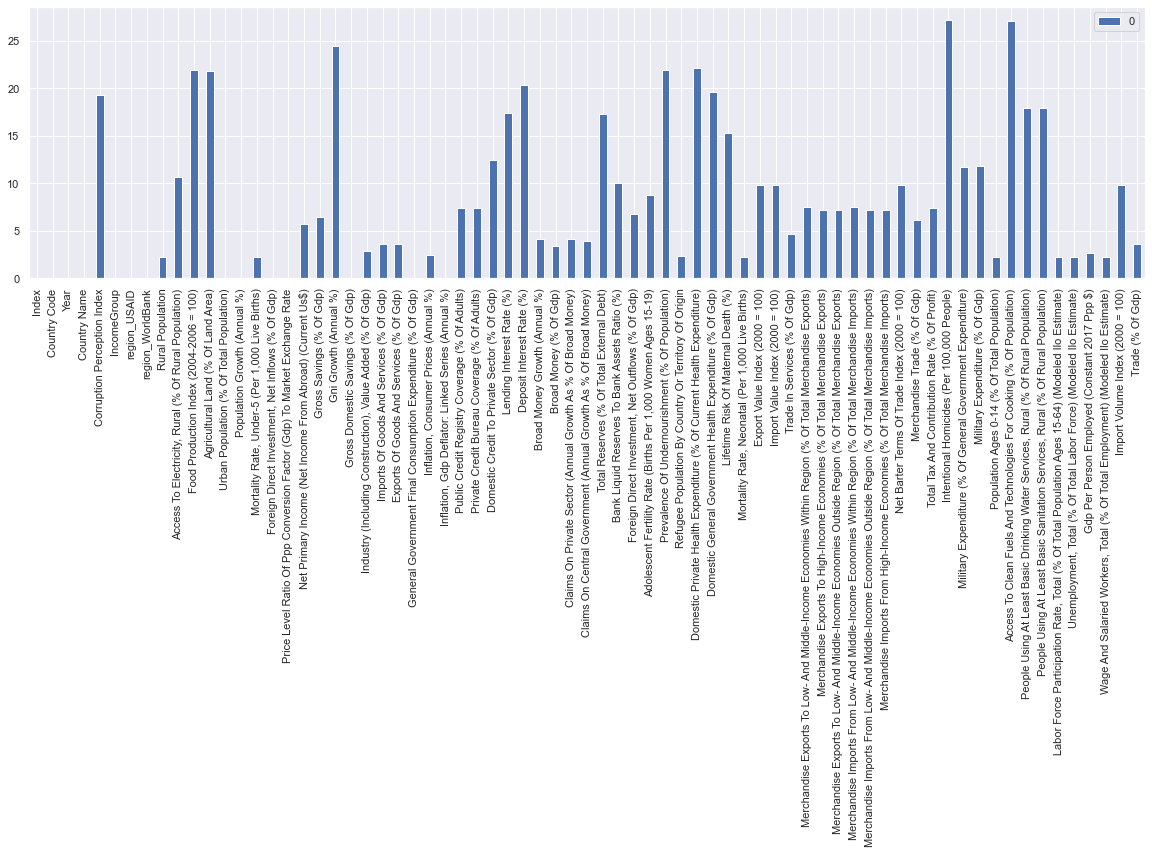

In [17]:
# Build model using random forest
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor(random_state=1,n_estimators=500,n_jobs=-1)

rfr.fit(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y)

print(rfr.score(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y))

#prediction
sample_imputeUnknown_y = rfr.predict(sample_imputeUnknown_X.iloc[:,1:])

df.loc[df['Urban Population (% Of Total Population)'].isnull(), 'Urban Population (% Of Total Population)'] = sample_imputeUnknown_y

pd.DataFrame(df.isna().sum()*100/df.shape[0]).plot.bar(figsize=(20,5))

## Mortality Rate, Under-5 (Per 1,000 Live Births) 

In [18]:
sample_impute = pd.get_dummies(df[['Index', 'Country Name','Year'
    ,'IncomeGroup', 'region_USAID',
       'region_WorldBank',
    'Population Growth (Annual %)',
                                   'Gross Domestic Savings (% Of Gdp)',
                                   'General Government Final Consumption Expenditure (% Of Gdp)'
                                  ,'Urban Population (% Of Total Population)','Mortality Rate, Under-5 (Per 1,000 Live Births)']])

# Split the data into two datasets
#train
sample_imputeKnown = sample_impute[sample_impute['Mortality Rate, Under-5 (Per 1,000 Live Births)'].notnull()] # without NaN

#test
sample_imputeUnknown = sample_impute[sample_impute['Mortality Rate, Under-5 (Per 1,000 Live Births)'].isnull()] #with null values


# splitting the train set into X and y
sample_imputeKnown_X = sample_imputeKnown.drop(['Mortality Rate, Under-5 (Per 1,000 Live Births)'], axis = 1)
sample_imputeKnown_y = sample_imputeKnown['Mortality Rate, Under-5 (Per 1,000 Live Births)']

#preparing the test set
sample_imputeUnknown_X = sample_imputeUnknown.drop(['Mortality Rate, Under-5 (Per 1,000 Live Births)'], axis = 1)

0.9990901252329304


<AxesSubplot:>

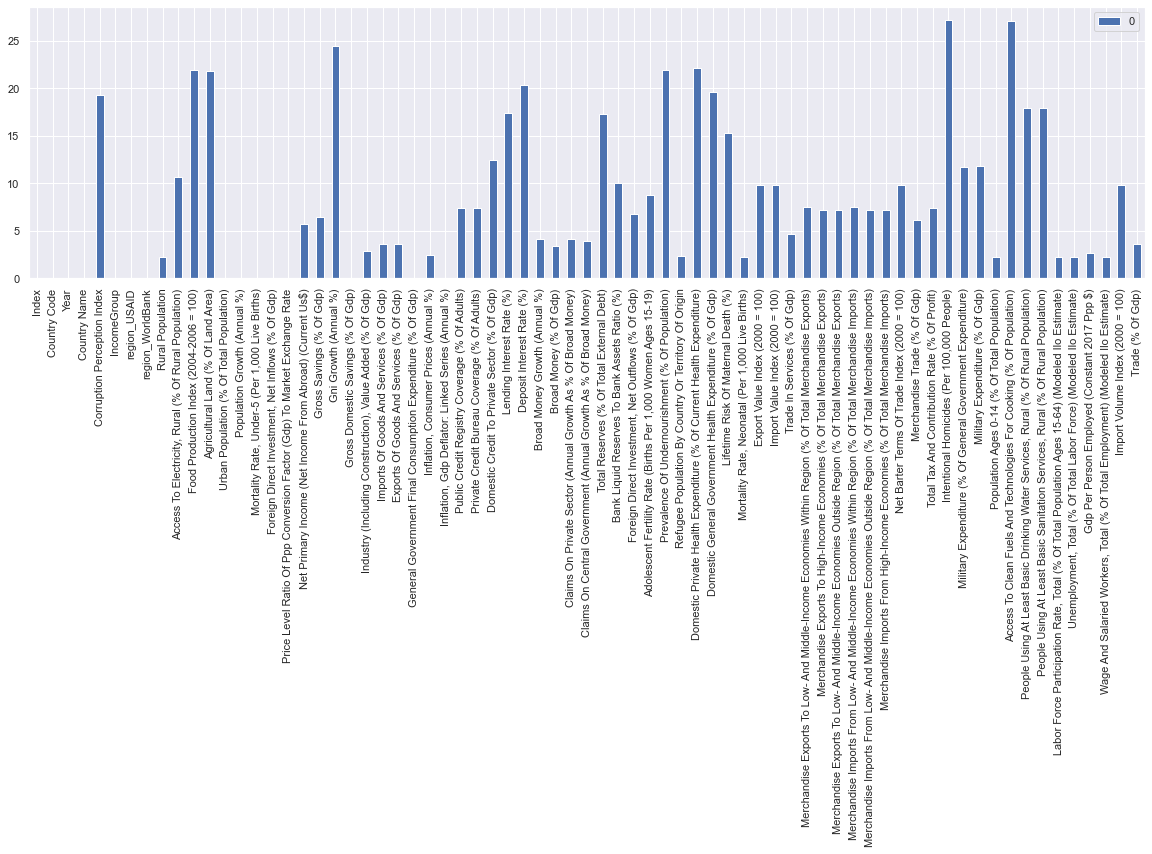

In [19]:
# Build model using random forest

rfr=RandomForestRegressor(random_state=1,n_estimators=500,n_jobs=-1)

rfr.fit(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y)

print(rfr.score(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y))

#prediction
sample_imputeUnknown_y = rfr.predict(sample_imputeUnknown_X.iloc[:,1:])

df.loc[df['Mortality Rate, Under-5 (Per 1,000 Live Births)'].isnull(), 'Mortality Rate, Under-5 (Per 1,000 Live Births)'] = sample_imputeUnknown_y

pd.DataFrame(df.isna().sum()*100/df.shape[0]).plot.bar(figsize=(20,5))

## Mortality Rate, Neonatal (Per 1,000 Live Births) 

In [20]:
sample_impute = pd.get_dummies(df[['Index', 'Country Name','Year'
    ,'IncomeGroup', 'region_USAID',
       'region_WorldBank',
    'Population Growth (Annual %)',
                                   'Gross Domestic Savings (% Of Gdp)',

                                  'Urban Population (% Of Total Population)','Mortality Rate, Under-5 (Per 1,000 Live Births)','Mortality Rate, Neonatal (Per 1,000 Live Births)']])

# Split the data into two datasets
#train
sample_imputeKnown = sample_impute[sample_impute['Mortality Rate, Neonatal (Per 1,000 Live Births)'].notnull()] # without NaN

#test
sample_imputeUnknown = sample_impute[sample_impute['Mortality Rate, Neonatal (Per 1,000 Live Births)'].isnull()] #with null values


# splitting the train set into X and y
sample_imputeKnown_X = sample_imputeKnown.drop(['Mortality Rate, Neonatal (Per 1,000 Live Births)'], axis = 1)
sample_imputeKnown_y = sample_imputeKnown['Mortality Rate, Neonatal (Per 1,000 Live Births)']

#preparing the test set
sample_imputeUnknown_X = sample_imputeUnknown.drop(['Mortality Rate, Neonatal (Per 1,000 Live Births)'], axis = 1)

0.9999412067440414


<AxesSubplot:>

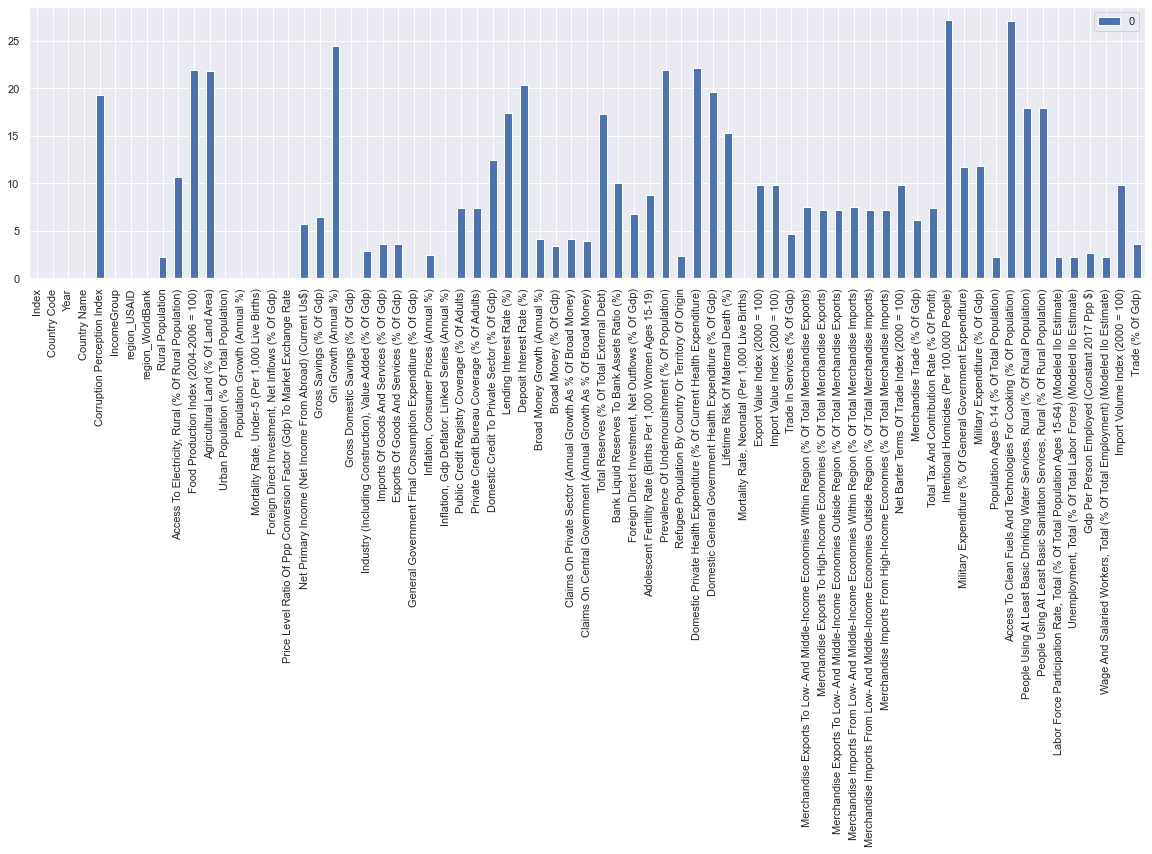

In [21]:
# Build model using random forest

rfr=RandomForestRegressor(random_state=1,n_estimators=500,n_jobs=-1)

rfr.fit(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y)

print(rfr.score(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y))

#prediction
sample_imputeUnknown_y = rfr.predict(sample_imputeUnknown_X.iloc[:,1:])

df.loc[df['Mortality Rate, Neonatal (Per 1,000 Live Births)'].isnull(), 'Mortality Rate, Neonatal (Per 1,000 Live Births)'] = sample_imputeUnknown_y

pd.DataFrame(df.isna().sum()*100/df.shape[0]).plot.bar(figsize=(20,5))

## Population Ages 0-14 (% Of Total Population)

In [22]:
sample_impute = pd.get_dummies(df[['Index', 'Country Name','Year'
    ,'IncomeGroup', 'region_USAID','region_WorldBank',
    'Population Growth (Annual %)','Urban Population (% Of Total Population)',
    'Mortality Rate, Under-5 (Per 1,000 Live Births)','Mortality Rate, Neonatal (Per 1,000 Live Births)',
                                  'Population Ages 0-14 (% Of Total Population)']])

# Split the data into two datasets
#train
sample_imputeKnown = sample_impute[sample_impute['Population Ages 0-14 (% Of Total Population)'].notnull()] # without NaN

#test
sample_imputeUnknown = sample_impute[sample_impute['Population Ages 0-14 (% Of Total Population)'].isnull()] #with null values


# splitting the train set into X and y
sample_imputeKnown_X = sample_imputeKnown.drop(['Population Ages 0-14 (% Of Total Population)'], axis = 1)
sample_imputeKnown_y = sample_imputeKnown['Population Ages 0-14 (% Of Total Population)']

#preparing the test set
sample_imputeUnknown_X = sample_imputeUnknown.drop(['Population Ages 0-14 (% Of Total Population)'], axis = 1)

0.9999485221468593


<AxesSubplot:>

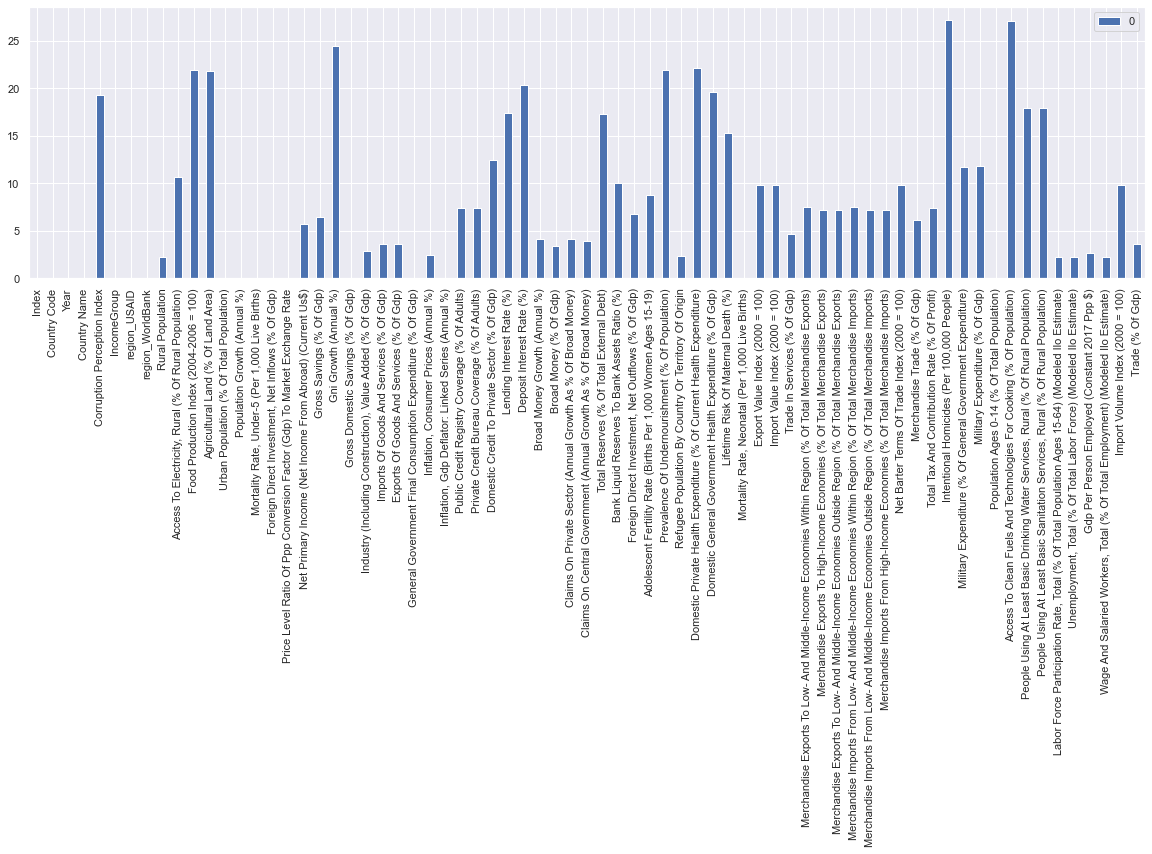

In [23]:
# Build model using random forest


rfr=RandomForestRegressor(random_state=1,n_estimators=500,n_jobs=-1)

rfr.fit(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y)

print(rfr.score(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y))

#prediction
sample_imputeUnknown_y = rfr.predict(sample_imputeUnknown_X.iloc[:,1:])

df.loc[df['Population Ages 0-14 (% Of Total Population)'].isnull(), 'Population Ages 0-14 (% Of Total Population)'] = sample_imputeUnknown_y

pd.DataFrame(df.isna().sum()*100/df.shape[0]).plot.bar(figsize=(20,5))

## Labor Force Participation Rate, Total (% Of Total Population Ages 15-64) (Modeled Ilo Estimate)(Per 1,000 Live Births) 

In [24]:
sample_impute = pd.get_dummies(df[['Index', 'Country Name','Year'
    ,'IncomeGroup', 'region_USAID',
       'region_WorldBank',
    'Population Growth (Annual %)',
                                   'Gross Domestic Savings (% Of Gdp)',
                                   'General Government Final Consumption Expenditure (% Of Gdp)'
                                  ,'Urban Population (% Of Total Population)','Mortality Rate, Under-5 (Per 1,000 Live Births)','Mortality Rate, Neonatal (Per 1,000 Live Births)',
                                  'Population Ages 0-14 (% Of Total Population)','Labor Force Participation Rate, Total (% Of Total Population Ages 15-64) (Modeled Ilo Estimate)']])

# Split the data into two datasets
#train
sample_imputeKnown = sample_impute[sample_impute['Labor Force Participation Rate, Total (% Of Total Population Ages 15-64) (Modeled Ilo Estimate)'].notnull()] # without NaN

#test
sample_imputeUnknown = sample_impute[sample_impute['Labor Force Participation Rate, Total (% Of Total Population Ages 15-64) (Modeled Ilo Estimate)'].isnull()] #with null values


# splitting the train set into X and y
sample_imputeKnown_X = sample_imputeKnown.drop(['Labor Force Participation Rate, Total (% Of Total Population Ages 15-64) (Modeled Ilo Estimate)'], axis = 1)
sample_imputeKnown_y = sample_imputeKnown['Labor Force Participation Rate, Total (% Of Total Population Ages 15-64) (Modeled Ilo Estimate)']

#preparing the test set
sample_imputeUnknown_X = sample_imputeUnknown.drop(['Labor Force Participation Rate, Total (% Of Total Population Ages 15-64) (Modeled Ilo Estimate)'], axis = 1)

0.9998704906510395


<AxesSubplot:>

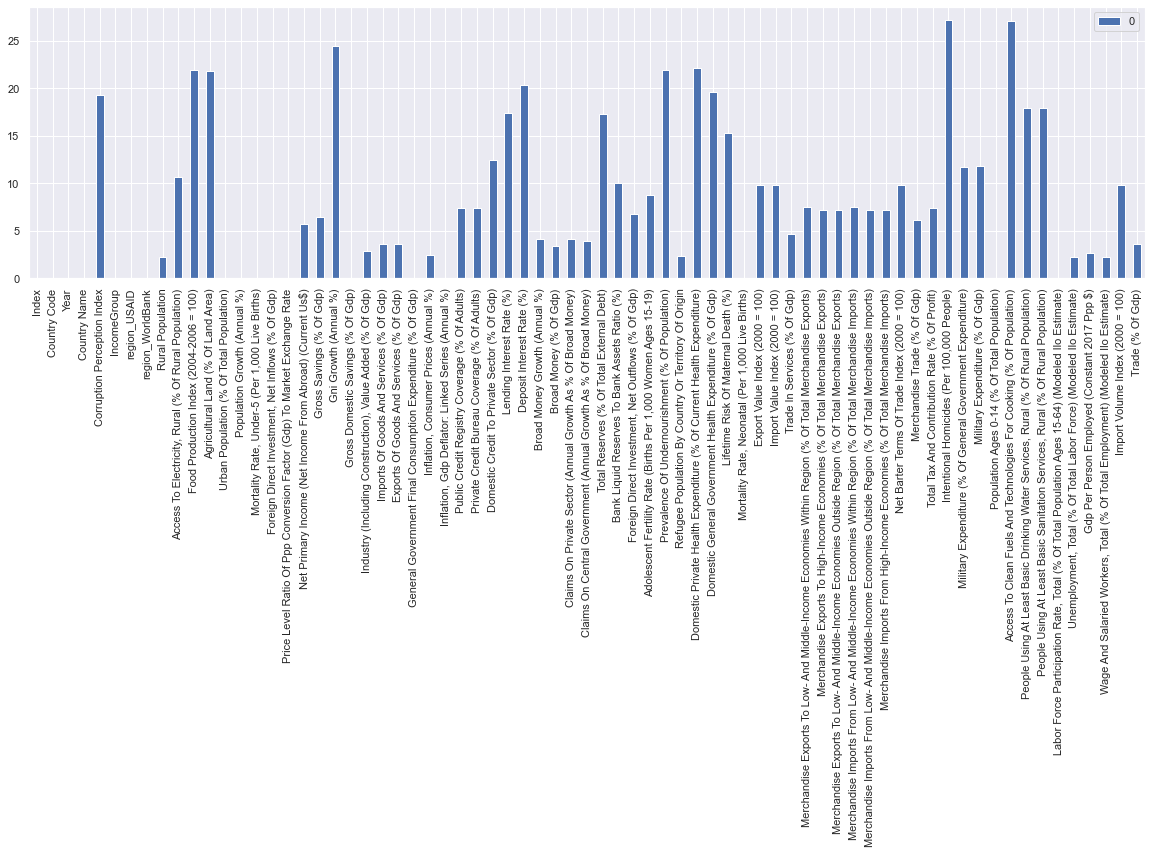

In [25]:
# Build model using random forest


rfr=RandomForestRegressor(random_state=1,n_estimators=500,n_jobs=-1)

rfr.fit(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y)

print(rfr.score(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y))

#prediction
sample_imputeUnknown_y = rfr.predict(sample_imputeUnknown_X.iloc[:,1:])

df.loc[df['Labor Force Participation Rate, Total (% Of Total Population Ages 15-64) (Modeled Ilo Estimate)'].isnull(), 'Labor Force Participation Rate, Total (% Of Total Population Ages 15-64) (Modeled Ilo Estimate)'] = sample_imputeUnknown_y

pd.DataFrame(df.isna().sum()*100/df.shape[0]).plot.bar(figsize=(20,5))

## Unemployment, Total (% Of Total Labor Force) (Modeled Ilo Estimate)

In [26]:
sample_impute = pd.get_dummies(df[['Index', 'Country Name','Year'
    ,'IncomeGroup', 'region_USAID',
       'region_WorldBank',
    'Population Growth (Annual %)',
    'Inflation, Gdp Deflator: Linked Series (Annual %)',
                                   'Gross Domestic Savings (% Of Gdp)',
                                   'General Government Final Consumption Expenditure (% Of Gdp)'
                                  ,'Urban Population (% Of Total Population)','Mortality Rate, Under-5 (Per 1,000 Live Births)','Mortality Rate, Neonatal (Per 1,000 Live Births)',
                                  'Population Ages 0-14 (% Of Total Population)','Labor Force Participation Rate, Total (% Of Total Population Ages 15-64) (Modeled Ilo Estimate)',
                                  'Unemployment, Total (% Of Total Labor Force) (Modeled Ilo Estimate)']])

# Split the data into two datasets
#train
sample_imputeKnown = sample_impute[sample_impute['Unemployment, Total (% Of Total Labor Force) (Modeled Ilo Estimate)'].notnull()] # without NaN

#test
sample_imputeUnknown = sample_impute[sample_impute['Unemployment, Total (% Of Total Labor Force) (Modeled Ilo Estimate)'].isnull()] #with null values


# splitting the train set into X and y
sample_imputeKnown_X = sample_imputeKnown.drop(['Unemployment, Total (% Of Total Labor Force) (Modeled Ilo Estimate)'], axis = 1)
sample_imputeKnown_y = sample_imputeKnown['Unemployment, Total (% Of Total Labor Force) (Modeled Ilo Estimate)']

#preparing the test set
sample_imputeUnknown_X = sample_imputeUnknown.drop(['Unemployment, Total (% Of Total Labor Force) (Modeled Ilo Estimate)'], axis = 1)

0.9997856829057914


<AxesSubplot:>

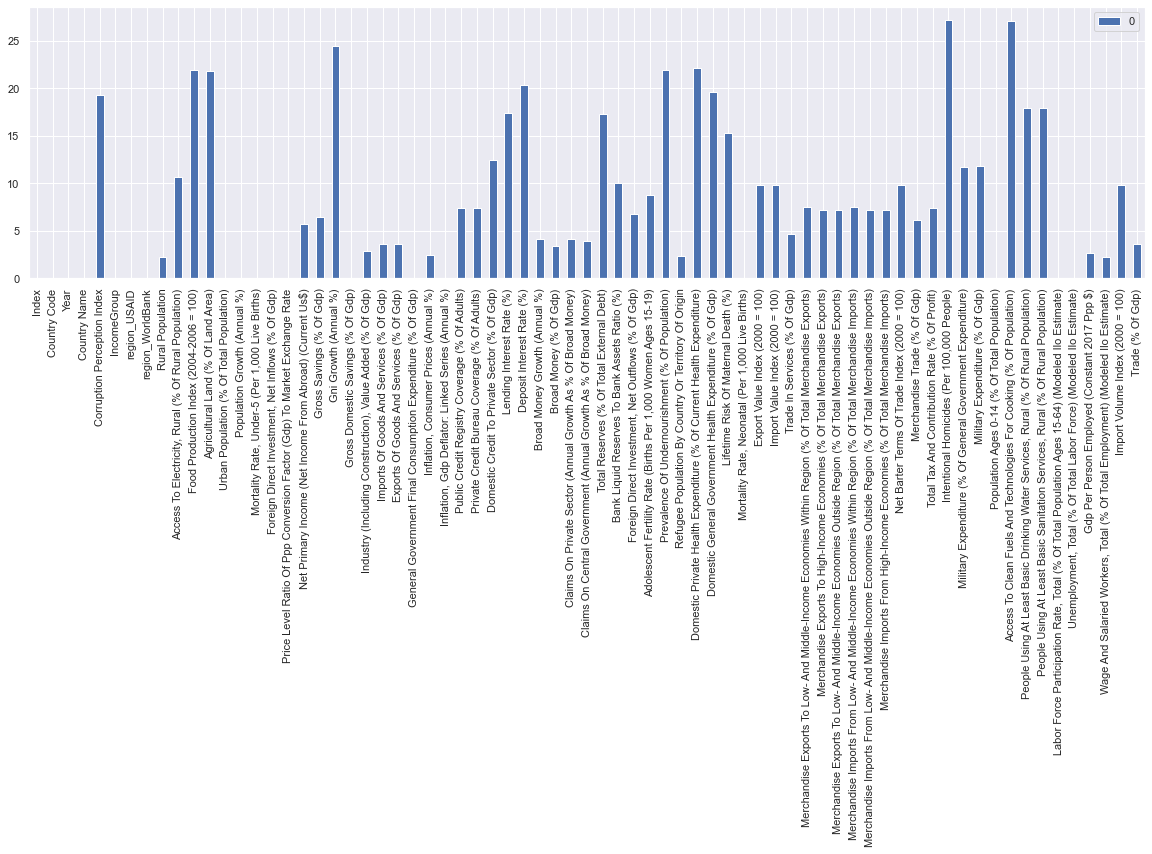

In [27]:
# Build model using random forest

rfr=RandomForestRegressor(random_state=1,n_estimators=500,n_jobs=-1)

rfr.fit(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y)

print(rfr.score(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y))

#prediction
sample_imputeUnknown_y = rfr.predict(sample_imputeUnknown_X.iloc[:,1:])

df.loc[df['Unemployment, Total (% Of Total Labor Force) (Modeled Ilo Estimate)'].isnull(), 'Unemployment, Total (% Of Total Labor Force) (Modeled Ilo Estimate)'] = sample_imputeUnknown_y

pd.DataFrame(df.isna().sum()*100/df.shape[0]).plot.bar(figsize=(20,5))

## Wage And Salaried Workers, Total (% Of Total Employment) (Modeled Ilo Estimate) 

In [28]:
sample_impute = pd.get_dummies(df[['Index', 'Country Name','Year'
    ,'IncomeGroup', 'region_USAID',
       'region_WorldBank',
    'Population Growth (Annual %)',
    'Inflation, Gdp Deflator: Linked Series (Annual %)',
                                   'Gross Domestic Savings (% Of Gdp)',
                                   'General Government Final Consumption Expenditure (% Of Gdp)'
                                  ,'Urban Population (% Of Total Population)','Mortality Rate, Under-5 (Per 1,000 Live Births)','Mortality Rate, Neonatal (Per 1,000 Live Births)',
                                  'Population Ages 0-14 (% Of Total Population)','Labor Force Participation Rate, Total (% Of Total Population Ages 15-64) (Modeled Ilo Estimate)',
                                  'Unemployment, Total (% Of Total Labor Force) (Modeled Ilo Estimate)','Wage And Salaried Workers, Total (% Of Total Employment) (Modeled Ilo Estimate)']])

# Split the data into two datasets
#train
sample_imputeKnown = sample_impute[sample_impute['Wage And Salaried Workers, Total (% Of Total Employment) (Modeled Ilo Estimate)'].notnull()] # without NaN

#test
sample_imputeUnknown = sample_impute[sample_impute['Wage And Salaried Workers, Total (% Of Total Employment) (Modeled Ilo Estimate)'].isnull()] #with null values


# splitting the train set into X and y
sample_imputeKnown_X = sample_imputeKnown.drop(['Wage And Salaried Workers, Total (% Of Total Employment) (Modeled Ilo Estimate)'], axis = 1)
sample_imputeKnown_y = sample_imputeKnown['Wage And Salaried Workers, Total (% Of Total Employment) (Modeled Ilo Estimate)']

#preparing the test set
sample_imputeUnknown_X = sample_imputeUnknown.drop(['Wage And Salaried Workers, Total (% Of Total Employment) (Modeled Ilo Estimate)'], axis = 1)

0.9997803619895547


<AxesSubplot:>

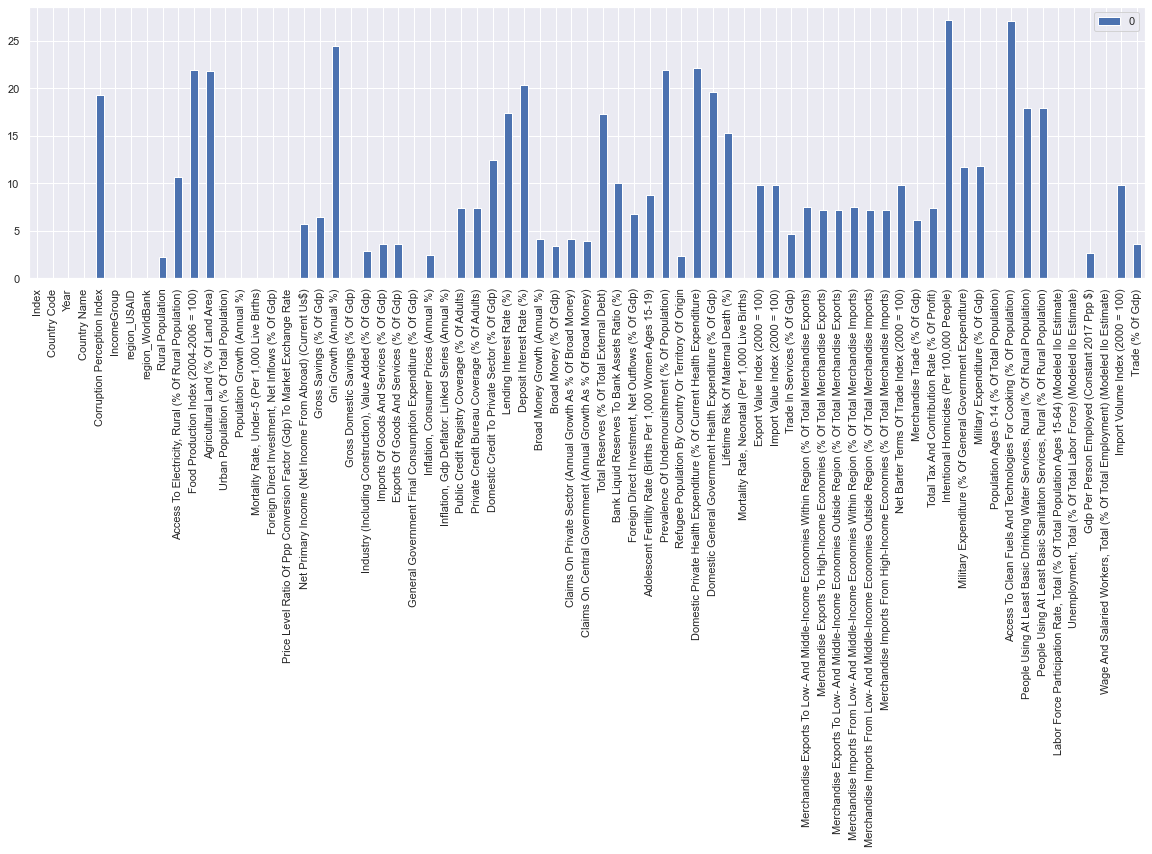

In [29]:
# Build model using random forest


rfr=RandomForestRegressor(random_state=1,n_estimators=500,n_jobs=-1)

rfr.fit(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y)

print(rfr.score(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y))

#prediction
sample_imputeUnknown_y = rfr.predict(sample_imputeUnknown_X.iloc[:,1:])

df.loc[df['Wage And Salaried Workers, Total (% Of Total Employment) (Modeled Ilo Estimate)'].isnull(), 'Wage And Salaried Workers, Total (% Of Total Employment) (Modeled Ilo Estimate)'] = sample_imputeUnknown_y

pd.DataFrame(df.isna().sum()*100/df.shape[0]).plot.bar(figsize=(20,5))

## Refugee Population By Country Or Territory Of Origin 

In [30]:
sample_impute = pd.get_dummies(df[['Index', 'Country Name','Year'
    ,'IncomeGroup', 'region_USAID',
       'region_WorldBank',
    'Population Growth (Annual %)',
                                   'Gross Domestic Savings (% Of Gdp)',
                                   'General Government Final Consumption Expenditure (% Of Gdp)'
                                  ,'Urban Population (% Of Total Population)','Mortality Rate, Under-5 (Per 1,000 Live Births)','Mortality Rate, Neonatal (Per 1,000 Live Births)',
                                  'Population Ages 0-14 (% Of Total Population)','Labor Force Participation Rate, Total (% Of Total Population Ages 15-64) (Modeled Ilo Estimate)',
                                 'Wage And Salaried Workers, Total (% Of Total Employment) (Modeled Ilo Estimate)',
                                  'Refugee Population By Country Or Territory Of Origin']])

# Split the data into two datasets
#train
sample_imputeKnown = sample_impute[sample_impute['Refugee Population By Country Or Territory Of Origin'].notnull()] # without NaN

#test
sample_imputeUnknown = sample_impute[sample_impute['Refugee Population By Country Or Territory Of Origin'].isnull()] #with null values


# splitting the train set into X and y
sample_imputeKnown_X = sample_imputeKnown.drop(['Refugee Population By Country Or Territory Of Origin'], axis = 1)
sample_imputeKnown_y = sample_imputeKnown['Refugee Population By Country Or Territory Of Origin']

#preparing the test set
sample_imputeUnknown_X = sample_imputeUnknown.drop(['Refugee Population By Country Or Territory Of Origin'], axis = 1)

0.9999934239158974


<AxesSubplot:>

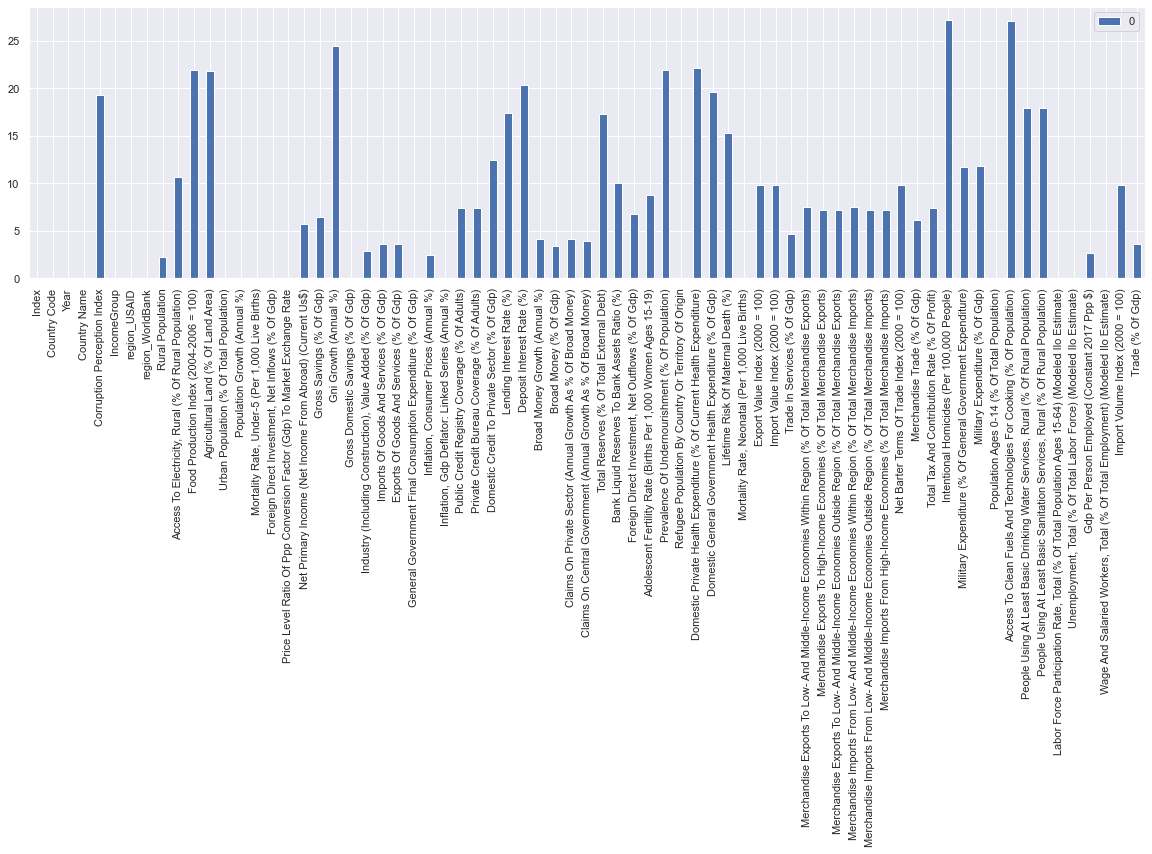

In [31]:
# Build model using random forest


rfr=RandomForestRegressor(random_state=1,n_estimators=500,n_jobs=-1)

rfr.fit(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y)

print(rfr.score(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y))

#prediction
sample_imputeUnknown_y = rfr.predict(sample_imputeUnknown_X.iloc[:,1:])

df.loc[df['Refugee Population By Country Or Territory Of Origin'].isnull(), 'Refugee Population By Country Or Territory Of Origin'] = sample_imputeUnknown_y

pd.DataFrame(df.isna().sum()*100/df.shape[0]).plot.bar(figsize=(20,5))

## Inflation, Consumer Prices (Annual %)

In [32]:
sample_impute = pd.get_dummies(df[['Index', 'Country Name','Year'
    ,'IncomeGroup', 'region_USAID',
       'region_WorldBank',
    'Population Growth (Annual %)',
    'Inflation, Gdp Deflator: Linked Series (Annual %)',
                                   'Price Level Ratio Of Ppp Conversion Factor (Gdp) To Market Exchange Rate',
                                   'Gross Domestic Savings (% Of Gdp)',
                                   'General Government Final Consumption Expenditure (% Of Gdp)'
                                  ,'Unemployment, Total (% Of Total Labor Force) (Modeled Ilo Estimate)','Wage And Salaried Workers, Total (% Of Total Employment) (Modeled Ilo Estimate)',
                                  'Inflation, Consumer Prices (Annual %)']])

# Split the data into two datasets
#train
sample_imputeKnown = sample_impute[sample_impute['Inflation, Consumer Prices (Annual %)'].notnull()] # without NaN

#test
sample_imputeUnknown = sample_impute[sample_impute['Inflation, Consumer Prices (Annual %)'].isnull()] #with null values


# splitting the train set into X and y
sample_imputeKnown_X = sample_imputeKnown.drop(['Inflation, Consumer Prices (Annual %)'], axis = 1)
sample_imputeKnown_y = sample_imputeKnown['Inflation, Consumer Prices (Annual %)']

#preparing the test set
sample_imputeUnknown_X = sample_imputeUnknown.drop(['Inflation, Consumer Prices (Annual %)'], axis = 1)

0.9864754735566122


<AxesSubplot:>

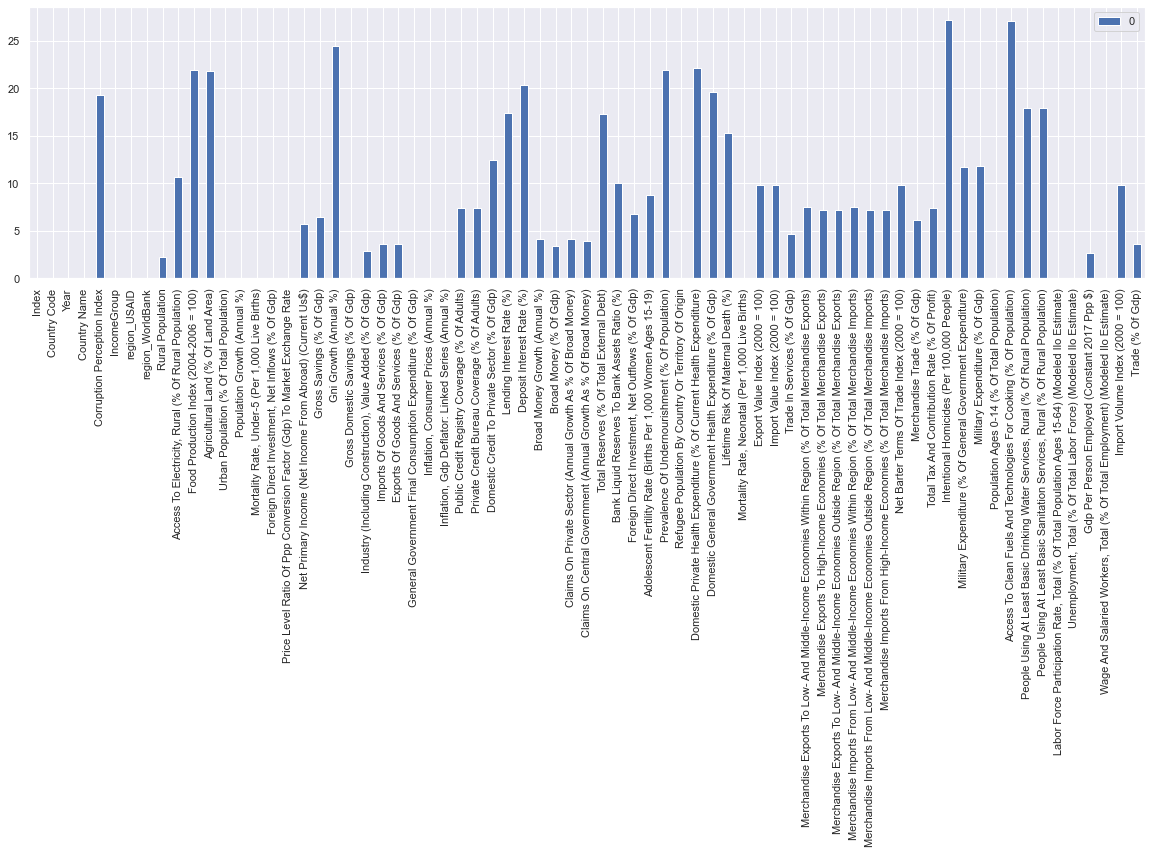

In [33]:
# Build model using random forest


rfr=RandomForestRegressor(random_state=1,n_estimators=500,n_jobs=-1)

rfr.fit(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y)

print(rfr.score(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y))

#prediction
sample_imputeUnknown_y = rfr.predict(sample_imputeUnknown_X.iloc[:,1:])

df.loc[df['Inflation, Consumer Prices (Annual %)'].isnull(), 'Inflation, Consumer Prices (Annual %)'] = sample_imputeUnknown_y

pd.DataFrame(df.isna().sum()*100/df.shape[0]).plot.bar(figsize=(20,5))

## Gdp Per Person Employed(Constant 2017 Ppp)

In [34]:
sample_impute = pd.get_dummies(df[['Index', 'Country Name','Year'
    ,'IncomeGroup', 'region_USAID',
       'region_WorldBank',
    'Population Growth (Annual %)','Price Level Ratio Of Ppp Conversion Factor (Gdp) To Market Exchange Rate',
                                   'Gross Domestic Savings (% Of Gdp)',
                                  'Urban Population (% Of Total Population)','Mortality Rate, Under-5 (Per 1,000 Live Births)','Mortality Rate, Neonatal (Per 1,000 Live Births)',
                                  'Population Ages 0-14 (% Of Total Population)','Labor Force Participation Rate, Total (% Of Total Population Ages 15-64) (Modeled Ilo Estimate)',
                                 'Wage And Salaried Workers, Total (% Of Total Employment) (Modeled Ilo Estimate)',
        'Gdp Per Person Employed (Constant 2017 Ppp $)']])

# Split the data into two datasets
#train
sample_imputeKnown = sample_impute[sample_impute['Gdp Per Person Employed (Constant 2017 Ppp $)'].notnull()] # without NaN

#test
sample_imputeUnknown = sample_impute[sample_impute['Gdp Per Person Employed (Constant 2017 Ppp $)'].isnull()] #with null values


# splitting the train set into X and y
sample_imputeKnown_X = sample_imputeKnown.drop(['Gdp Per Person Employed (Constant 2017 Ppp $)'], axis = 1)
sample_imputeKnown_y = sample_imputeKnown['Gdp Per Person Employed (Constant 2017 Ppp $)']

#preparing the test set
sample_imputeUnknown_X = sample_imputeUnknown.drop(['Gdp Per Person Employed (Constant 2017 Ppp $)'], axis = 1)

0.9994311114104726


<AxesSubplot:>

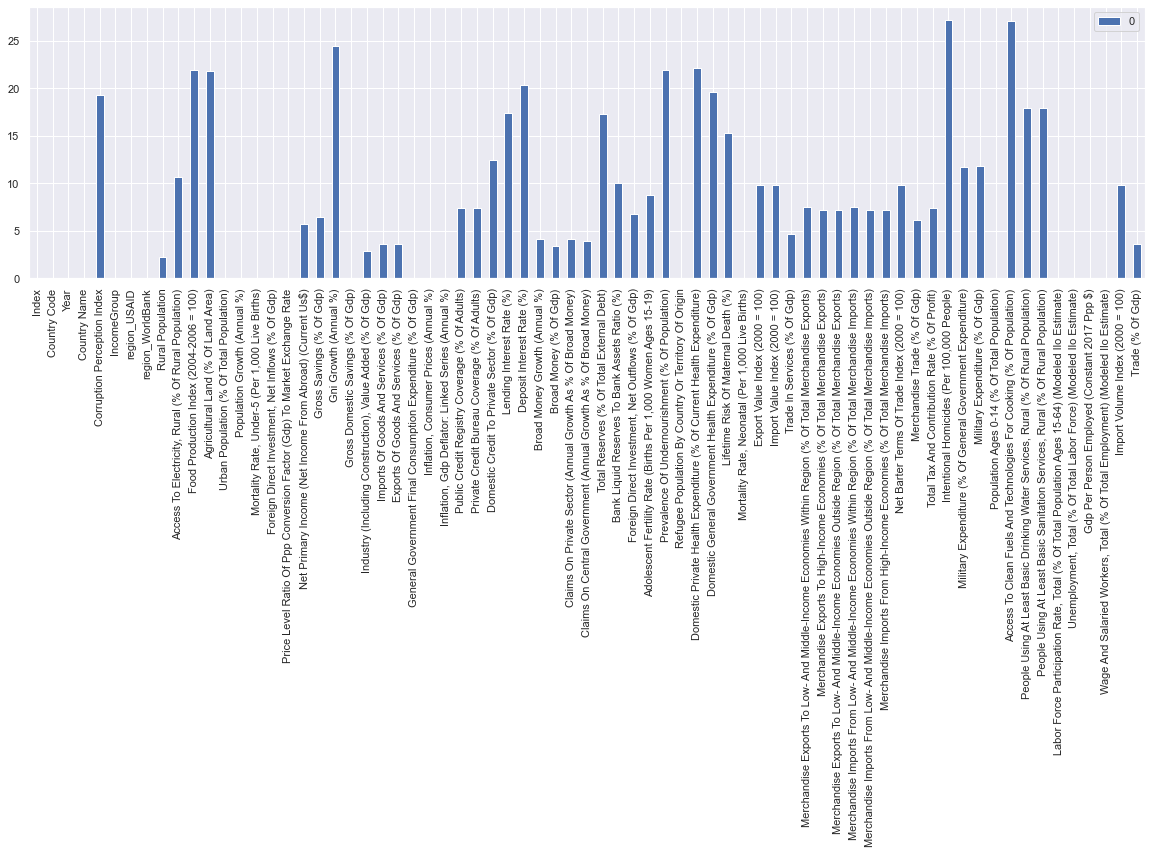

In [35]:
# Build model using random forest


rfr=RandomForestRegressor(random_state=1,n_estimators=500,n_jobs=-1)

rfr.fit(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y)

print(rfr.score(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y))

#prediction
sample_imputeUnknown_y = rfr.predict(sample_imputeUnknown_X.iloc[:,1:])

df.loc[df['Gdp Per Person Employed (Constant 2017 Ppp $)'].isnull(), 'Gdp Per Person Employed (Constant 2017 Ppp $)'] = sample_imputeUnknown_y

pd.DataFrame(df.isna().sum()*100/df.shape[0]).plot.bar(figsize=(20,5))

## Industry (Including Construction), Value Added (% Of Gdp) 

In [36]:
sample_impute = pd.get_dummies(df[['Index', 'Country Name','Year'
    ,'IncomeGroup', 'region_USAID',
       'region_WorldBank',
    'Population Growth (Annual %)',
                                   'Gross Domestic Savings (% Of Gdp)',
                                   'General Government Final Consumption Expenditure (% Of Gdp)'
                                  ,'Urban Population (% Of Total Population)','Mortality Rate, Under-5 (Per 1,000 Live Births)','Mortality Rate, Neonatal (Per 1,000 Live Births)',
                                  'Population Ages 0-14 (% Of Total Population)','Labor Force Participation Rate, Total (% Of Total Population Ages 15-64) (Modeled Ilo Estimate)',
                                  'Industry (Including Construction), Value Added (% Of Gdp)']])

# Split the data into two datasets
#train
sample_imputeKnown = sample_impute[sample_impute['Industry (Including Construction), Value Added (% Of Gdp)'].notnull()] # without NaN

#test
sample_imputeUnknown = sample_impute[sample_impute['Industry (Including Construction), Value Added (% Of Gdp)'].isnull()] #with null values


# splitting the train set into X and y
sample_imputeKnown_X = sample_imputeKnown.drop(['Industry (Including Construction), Value Added (% Of Gdp)'], axis = 1)
sample_imputeKnown_y = sample_imputeKnown['Industry (Including Construction), Value Added (% Of Gdp)']

#preparing the test set
sample_imputeUnknown_X = sample_imputeUnknown.drop(['Industry (Including Construction), Value Added (% Of Gdp)'], axis = 1)

0.9989456806434084


<AxesSubplot:>

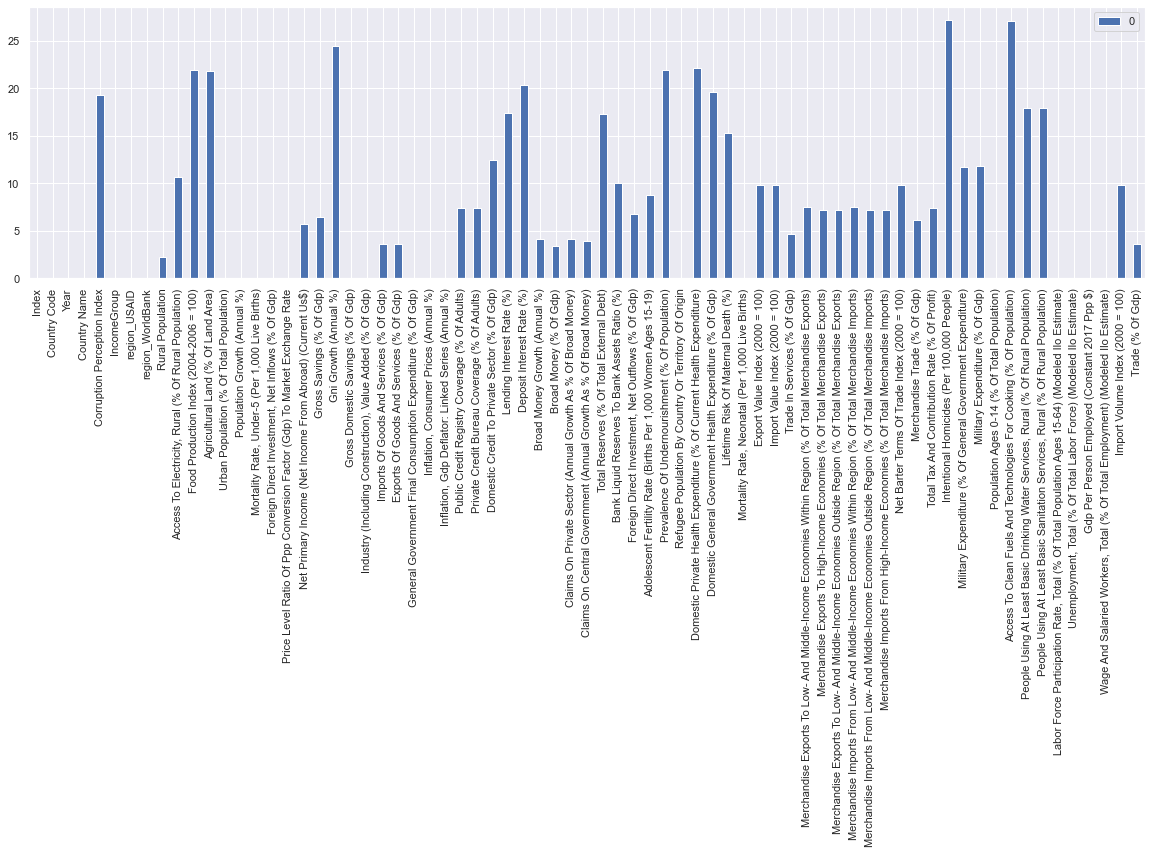

In [37]:
# Build model using random forest

rfr=RandomForestRegressor(random_state=1,n_estimators=500,n_jobs=-1)

rfr.fit(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y)

print(rfr.score(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y))

#prediction
sample_imputeUnknown_y = rfr.predict(sample_imputeUnknown_X.iloc[:,1:])

df.loc[df['Industry (Including Construction), Value Added (% Of Gdp)'].isnull(), 'Industry (Including Construction), Value Added (% Of Gdp)'] = sample_imputeUnknown_y

pd.DataFrame(df.isna().sum()*100/df.shape[0]).plot.bar(figsize=(20,5))

## Broad Money (% Of Gdp) 

In [38]:
sample_impute = pd.get_dummies(df[['Index', 'Country Name','Year'
    ,'IncomeGroup', 'region_USAID',
       'region_WorldBank',
    'Population Growth (Annual %)','Gross Domestic Savings (% Of Gdp)','Urban Population (% Of Total Population)',
                                   'Mortality Rate, Under-5 (Per 1,000 Live Births)','Mortality Rate, Neonatal (Per 1,000 Live Births)',
'Industry (Including Construction), Value Added (% Of Gdp)','Broad Money (% Of Gdp)']])

# Split the data into two datasets
#train
sample_imputeKnown = sample_impute[sample_impute['Broad Money (% Of Gdp)'].notnull()] # without NaN

#test
sample_imputeUnknown = sample_impute[sample_impute['Broad Money (% Of Gdp)'].isnull()] #with null values


# splitting the train set into X and y
sample_imputeKnown_X = sample_imputeKnown.drop(['Broad Money (% Of Gdp)'], axis = 1)
sample_imputeKnown_y = sample_imputeKnown['Broad Money (% Of Gdp)']

#preparing the test set
sample_imputeUnknown_X = sample_imputeUnknown.drop(['Broad Money (% Of Gdp)'], axis = 1)

0.9994460620354718


<AxesSubplot:>

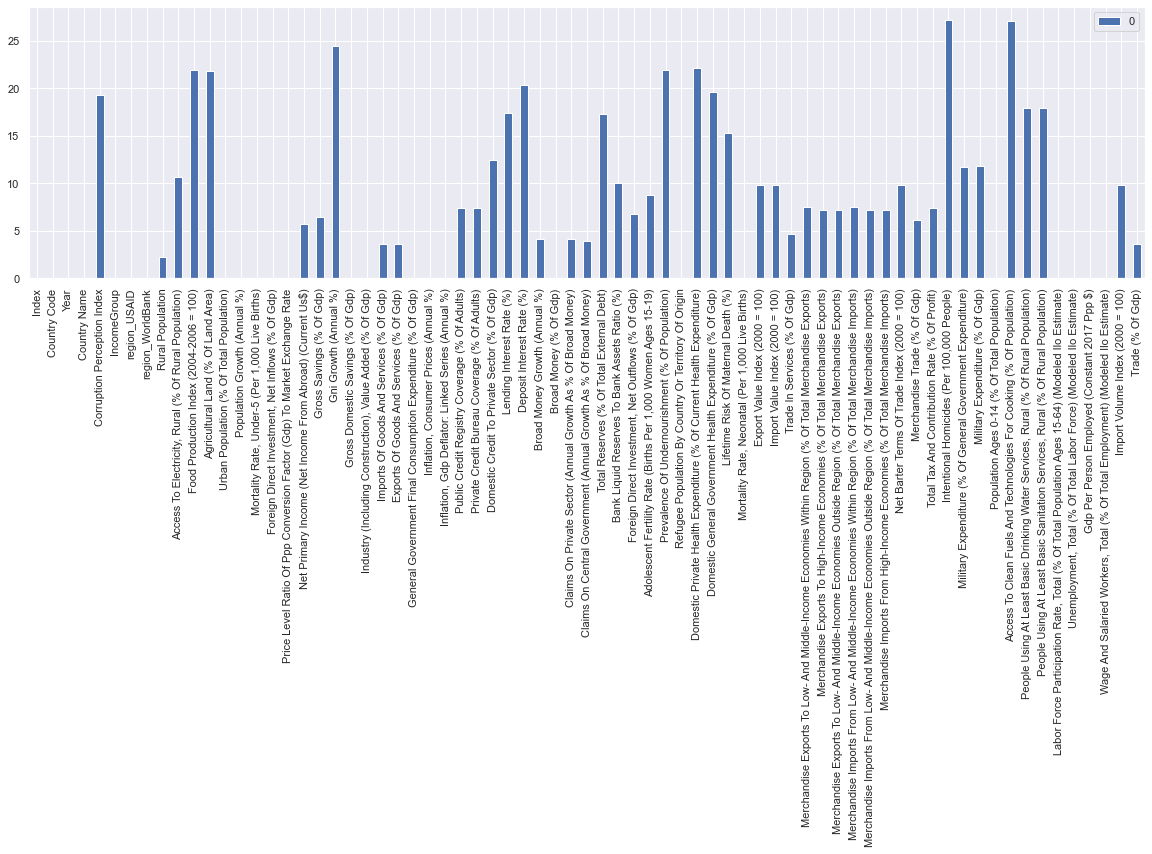

In [39]:
# Build model using random forest


rfr=RandomForestRegressor(random_state=1,n_estimators=500,n_jobs=-1)

rfr.fit(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y)

print(rfr.score(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y))

#prediction
sample_imputeUnknown_y = rfr.predict(sample_imputeUnknown_X.iloc[:,1:])

df.loc[df['Broad Money (% Of Gdp)'].isnull(), 'Broad Money (% Of Gdp)'] = sample_imputeUnknown_y

pd.DataFrame(df.isna().sum()*100/df.shape[0]).plot.bar(figsize=(20,5))

## Imports Of Goods And Services (% Of Gdp) 

In [40]:
sample_impute = pd.get_dummies(df[['Index', 'Country Name','Year'
    ,'IncomeGroup', 'region_USAID',
       'region_WorldBank',
    'Inflation, Gdp Deflator: Linked Series (Annual %)',
                                   'Price Level Ratio Of Ppp Conversion Factor (Gdp) To Market Exchange Rate',
                                   'Gross Domestic Savings (% Of Gdp)',
                                   'General Government Final Consumption Expenditure (% Of Gdp)'
                                  ,'Inflation, Consumer Prices (Annual %)','Gdp Per Person Employed (Constant 2017 Ppp $)',
'Imports Of Goods And Services (% Of Gdp)']])

# Split the data into two datasets
#train
sample_imputeKnown = sample_impute[sample_impute['Imports Of Goods And Services (% Of Gdp)'].notnull()] # without NaN

#test
sample_imputeUnknown = sample_impute[sample_impute['Imports Of Goods And Services (% Of Gdp)'].isnull()] #with null values


# splitting the train set into X and y
sample_imputeKnown_X = sample_imputeKnown.drop(['Imports Of Goods And Services (% Of Gdp)'], axis = 1)
sample_imputeKnown_y = sample_imputeKnown['Imports Of Goods And Services (% Of Gdp)']

#preparing the test set
sample_imputeUnknown_X = sample_imputeUnknown.drop(['Imports Of Goods And Services (% Of Gdp)'], axis = 1)

0.9977915212958912


<AxesSubplot:>

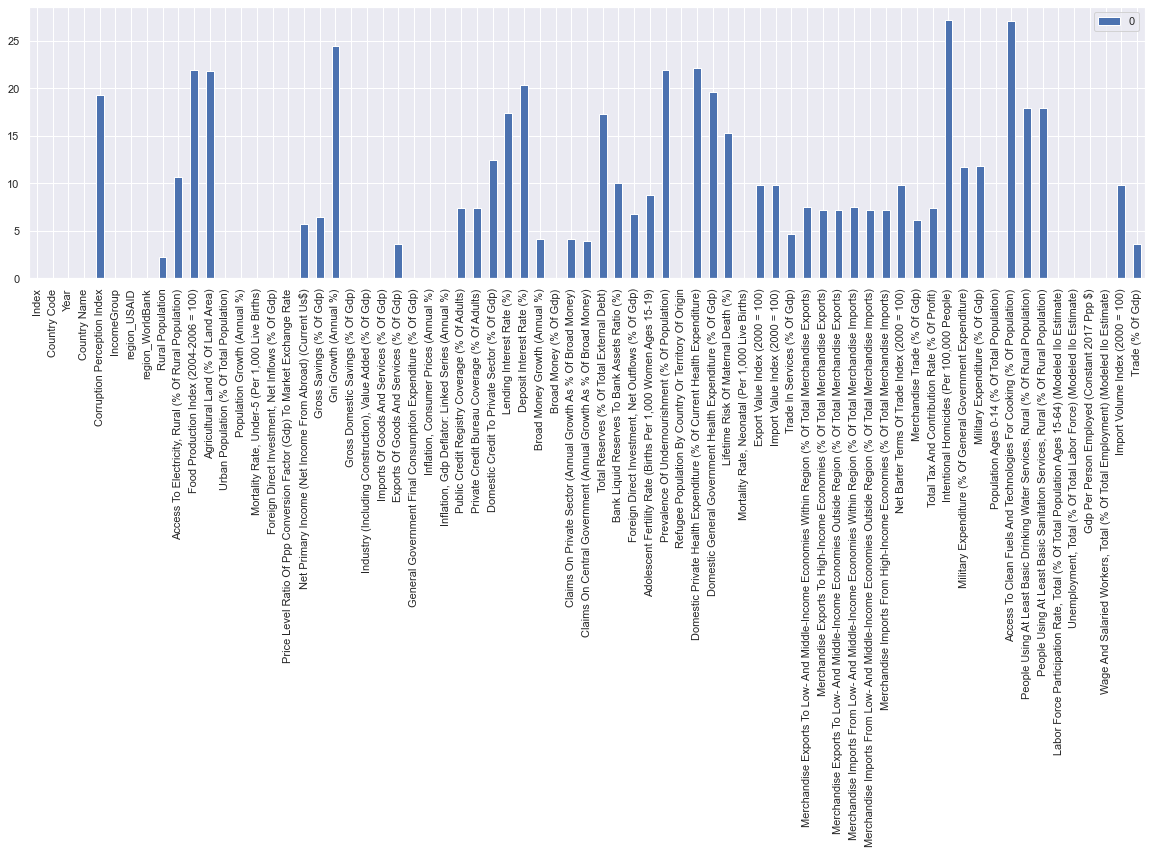

In [41]:
# Build model using random forest


rfr=RandomForestRegressor(random_state=1,n_estimators=500,n_jobs=-1)

rfr.fit(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y)

print(rfr.score(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y))

#prediction
sample_imputeUnknown_y = rfr.predict(sample_imputeUnknown_X.iloc[:,1:])

df.loc[df['Imports Of Goods And Services (% Of Gdp)'].isnull(), 'Imports Of Goods And Services (% Of Gdp)'] = sample_imputeUnknown_y

pd.DataFrame(df.isna().sum()*100/df.shape[0]).plot.bar(figsize=(20,5))

## Exports Of Goods And Services (% Of Gdp) 

In [42]:
sample_impute = pd.get_dummies(df[['Index', 'Country Name','Year'
    ,'IncomeGroup', 'region_USAID',
       'region_WorldBank',
    'Inflation, Gdp Deflator: Linked Series (Annual %)',
                                   'Price Level Ratio Of Ppp Conversion Factor (Gdp) To Market Exchange Rate',
                                   'Gross Domestic Savings (% Of Gdp)',
                                   'General Government Final Consumption Expenditure (% Of Gdp)'
                                  ,'Inflation, Consumer Prices (Annual %)','Gdp Per Person Employed (Constant 2017 Ppp $)',
'Imports Of Goods And Services (% Of Gdp)','Exports Of Goods And Services (% Of Gdp)']])

# Split the data into two datasets
#train
sample_imputeKnown = sample_impute[sample_impute['Exports Of Goods And Services (% Of Gdp)'].notnull()] # without NaN

#test
sample_imputeUnknown = sample_impute[sample_impute['Exports Of Goods And Services (% Of Gdp)'].isnull()] #with null values


# splitting the train set into X and y
sample_imputeKnown_X = sample_imputeKnown.drop(['Exports Of Goods And Services (% Of Gdp)'], axis = 1)
sample_imputeKnown_y = sample_imputeKnown['Exports Of Goods And Services (% Of Gdp)']

#preparing the test set
sample_imputeUnknown_X = sample_imputeUnknown.drop(['Exports Of Goods And Services (% Of Gdp)'], axis = 1)

0.9978502180460763


<AxesSubplot:>

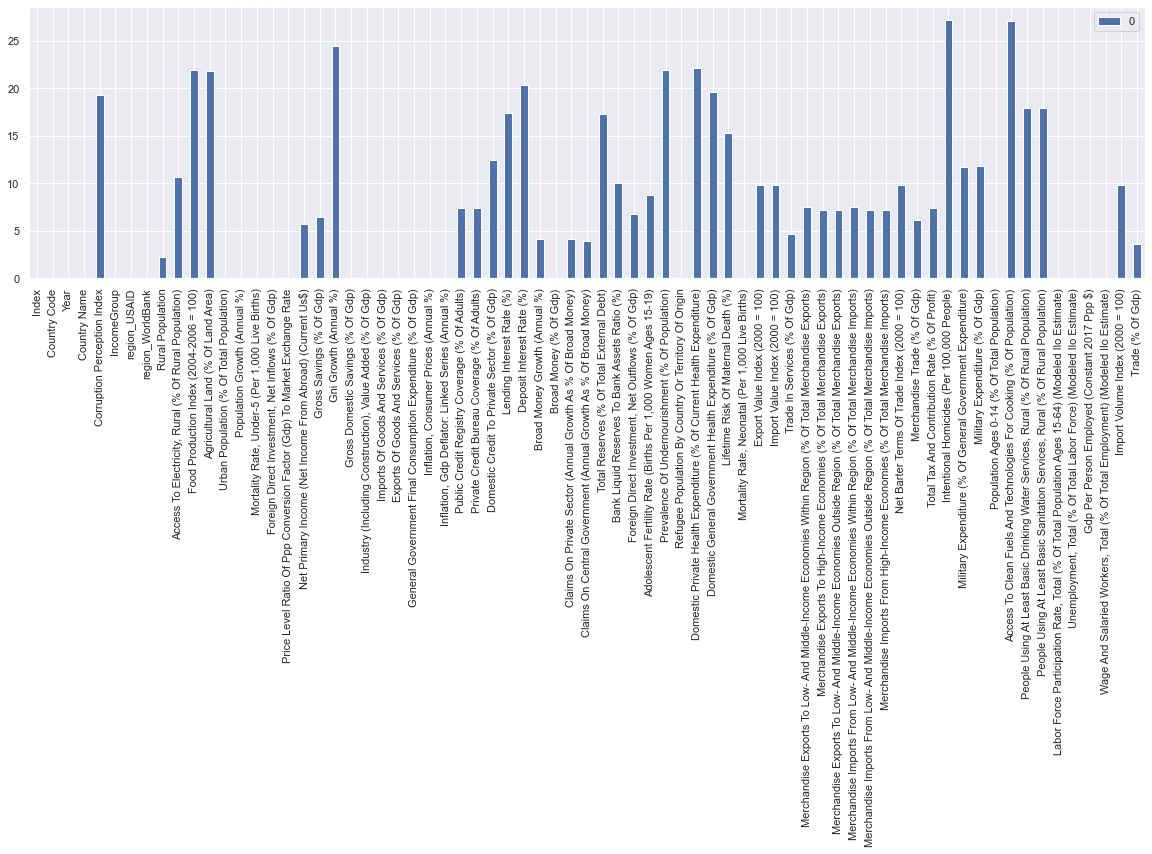

In [43]:
# Build model using random forest

rfr=RandomForestRegressor(random_state=1,n_estimators=500,n_jobs=-1)

rfr.fit(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y)

print(rfr.score(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y))

#prediction
sample_imputeUnknown_y = rfr.predict(sample_imputeUnknown_X.iloc[:,1:])

df.loc[df['Exports Of Goods And Services (% Of Gdp)'].isnull(), 'Exports Of Goods And Services (% Of Gdp)'] = sample_imputeUnknown_y

pd.DataFrame(df.isna().sum()*100/df.shape[0]).plot.bar(figsize=(20,5))

##  Trade (% Of Gdp) 

In [44]:
sample_impute = pd.get_dummies(df[['Index', 'Country Name','Year'
    ,'IncomeGroup', 'region_USAID',
       'region_WorldBank',
    'Inflation, Gdp Deflator: Linked Series (Annual %)',
                                   'Price Level Ratio Of Ppp Conversion Factor (Gdp) To Market Exchange Rate',
                                   'Gross Domestic Savings (% Of Gdp)',
                                   'General Government Final Consumption Expenditure (% Of Gdp)'
                                  ,'Inflation, Consumer Prices (Annual %)','Gdp Per Person Employed (Constant 2017 Ppp $)',
'Imports Of Goods And Services (% Of Gdp)','Exports Of Goods And Services (% Of Gdp)','Trade (% Of Gdp)']])

# Split the data into two datasets
#train
sample_imputeKnown = sample_impute[sample_impute['Trade (% Of Gdp)'].notnull()] # without NaN

#test
sample_imputeUnknown = sample_impute[sample_impute['Trade (% Of Gdp)'].isnull()] #with null values


# splitting the train set into X and y
sample_imputeKnown_X = sample_imputeKnown.drop(['Trade (% Of Gdp)'], axis = 1)
sample_imputeKnown_y = sample_imputeKnown['Trade (% Of Gdp)']

#preparing the test set
sample_imputeUnknown_X = sample_imputeUnknown.drop(['Trade (% Of Gdp)'], axis = 1)

0.9996912926110193


<AxesSubplot:>

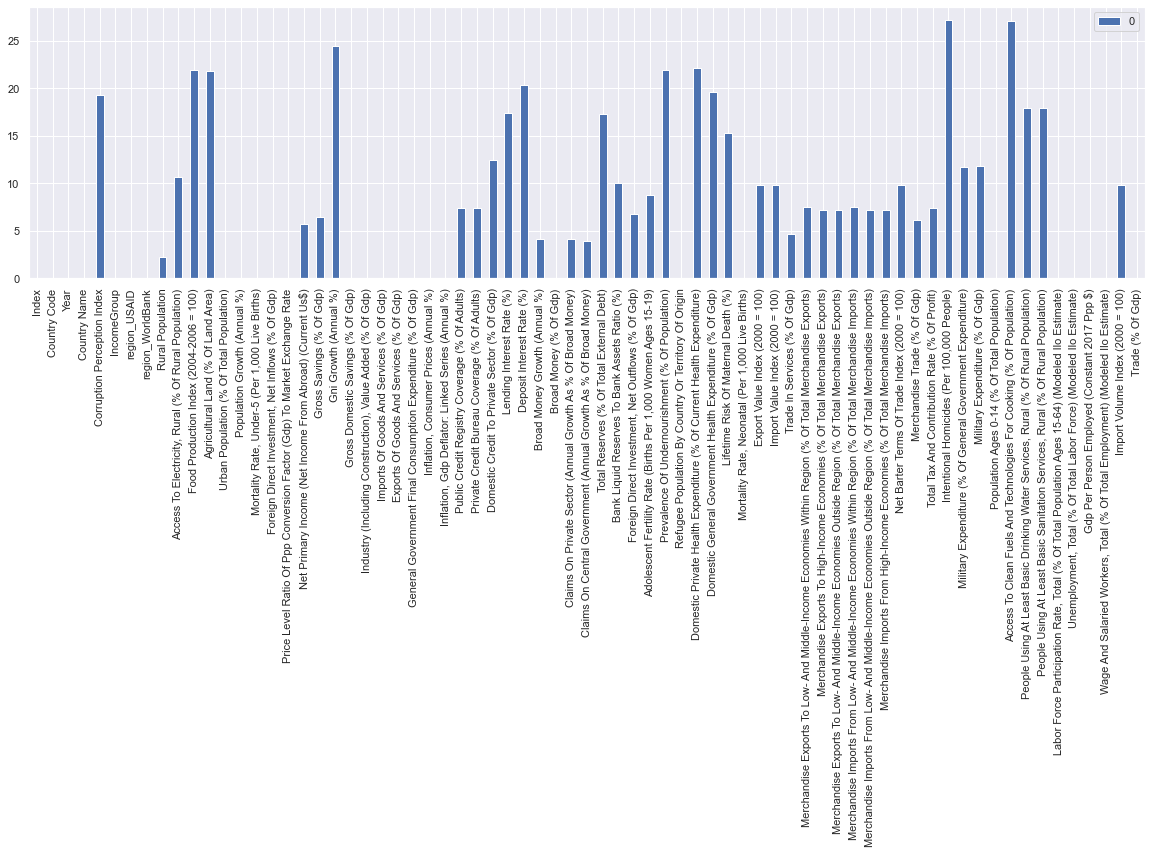

In [45]:
# Build model using random forest


rfr=RandomForestRegressor(random_state=1,n_estimators=500,n_jobs=-1)

rfr.fit(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y)

print(rfr.score(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y))

#prediction
sample_imputeUnknown_y = rfr.predict(sample_imputeUnknown_X.iloc[:,1:])

df.loc[df['Trade (% Of Gdp)'].isnull(), 'Trade (% Of Gdp)'] = sample_imputeUnknown_y

pd.DataFrame(df.isna().sum()*100/df.shape[0]).plot.bar(figsize=(20,5))